# Ideas

- Andere Modelle ausprobieren 
- Grid Search
- Adversarial Validation! (To check if train and test data have significant differences)

## Flo changes:
- Created dummy variable for home_type 
- Impute year_built (avg_bauperiode)
- Impute NA with average for micro rating - we can still remove the features, just in case 
- Outliers cleaned - 2 or 3 standard deviations - based on price_m2 (to account both for price and size)
- Added additional models - include cross-validation -> normalization still to be added into pipeline 
- Different features per model: for example no lon, lat for linear regression 

# Imports for Data Handling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


# Data Exploration

In [113]:
# First Setup

# Load data

# Test Data
file_path = 'data/training_data.csv'

# Train Data
# file_path = 'data/training_data.csv'

data = pd.read_csv(file_path)

# make sure pd show all columns
pd.set_option('display.max_columns', None)

data.head()


/tmp/ipykernel_967/39892272.py:11: DtypeWarning: Columns (25,30,36,37,43,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Unnamed: 0                 GDENAMK  GDENR KTKZ  \
0           1                Cossonay   5477   VD   
1           2                Saas-Fee   6290   VS   
2           3                  Lugano   5192   TI   
3           4  Neuhausen am Rheinfall   2937   SH   
4           5      Chavannes-des-Bois   5708   VD   

                                       address  appartments   area  \
0                          1304 Cossonay-Ville          NaN   95.0   
1           Hannigstrasse 45, 3906 Saas-Fee VS          NaN   40.0   
2                               6962 Viganello          NaN  112.0   
3  Poststrasse 11, 8212 Neuhausen am Rheinfall          NaN  104.0   
4                                 1290 Versoix          NaN  180.0   

   area_useable  balcony  basement  bath  bath_tube  cabletv  ceiling  \
0           NaN      NaN       NaN   NaN        NaN      NaN      NaN   
1           NaN      NaN       NaN   NaN        NaN      1.0      NaN   
2           NaN      NaN       NaN   NaN        NaN      NaN      NaN   
3           NaN      1.0       NaN   NaN        NaN      1.0      NaN   
4           NaN      NaN       NaN   NaN        NaN      NaN      NaN   

   cheminee        date                                              descr  \
0       NaN  28.08.2019  Bonjour, Nous remettons notre appartement de 3...   
1       NaN  23.04.2019  Saas-Fee: 2 Zi Whg "Saphir" Saison-/Jahresmiet...   
2       NaN  16.04.2019  RIF.6238. Splendido attico 3.5 locali a Vigane...   
3       NaN  03.05.2019  An zentraler Lage vermieten wir diese moderne ...   
4       NaN  28.05.2019  1615MC Versoix. Au sein d'un quartier résident...   

   dishwasher  dryer  elevator  floors  furnished  garden_m2  gardenshed  \
0         NaN    NaN       NaN     NaN        NaN        NaN         NaN   
1         NaN    NaN       NaN     5.0        NaN        NaN         NaN   
2         NaN    NaN       NaN     NaN        NaN        NaN         NaN   
3         NaN    NaN       1.0     3.0        NaN        NaN         NaN   
4         NaN    NaN       NaN     NaN        NaN        NaN         NaN   

  heating_air heating_earth  heating_electro heating_far  heating_gas  \
0         NaN           NaN              NaN         NaN          NaN   
1         NaN           NaN              NaN         NaN          NaN   
2         NaN           NaN              NaN         NaN          NaN   
3         NaN           NaN              NaN         NaN          NaN   
4         NaN           NaN              NaN         NaN          NaN   

   heating_oil heating_pellets home_type  kids_friendly        lat  laundry  \
0          NaN             NaN   Wohnung            NaN  46.612988      NaN   
1          NaN             NaN   Wohnung            NaN  46.109362      NaN   
2          NaN             NaN    Attika            NaN  46.013300      NaN   
3          NaN             NaN   Wohnung            1.0  47.682710      NaN   
4          NaN             NaN   Wohnung            NaN  46.276757      NaN   

        lon manlift middle_house  minergie  month  msregion  newly_built  \
0  6.500815     NaN          NaN       NaN      8        90            0   
1  7.927069     NaN          NaN       NaN      4        96            0   
2  8.967430     NaN          NaN       NaN      4        82            0   
3  8.619577     NaN          NaN       NaN      5        50            0   
4  6.168958     NaN          NaN       NaN      5        86            0   

   oldbuilding oven  parking_indoor  parking_outside  pets  playground pool  \
0          NaN  NaN             NaN              NaN   NaN         NaN  NaN   
1          NaN  NaN             NaN              NaN   NaN         NaN  NaN   
2          NaN  NaN             NaN              NaN   NaN         NaN  NaN   
3          NaN  NaN             1.0              NaN   NaN         NaN  NaN   
4          NaN  NaN             NaN              NaN   NaN         NaN  NaN   

   quarter_general  quarter_specific quiet  raised_g

In [114]:
# Data Overview

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 95 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      72000 non-null  int64  
 1   GDENAMK                         72000 non-null  object 
 2   GDENR                           72000 non-null  int64  
 3   KTKZ                            72000 non-null  object 
 4   address                         72000 non-null  object 
 5   appartments                     0 non-null      float64
 6   area                            57678 non-null  float64
 7   area_useable                    4963 non-null   float64
 8   balcony                         34583 non-null  float64
 9   basement                        971 non-null    float64
 10  bath                            487 non-null    float64
 11  bath_tube                       0 non-null      float64
 12  cabletv                         

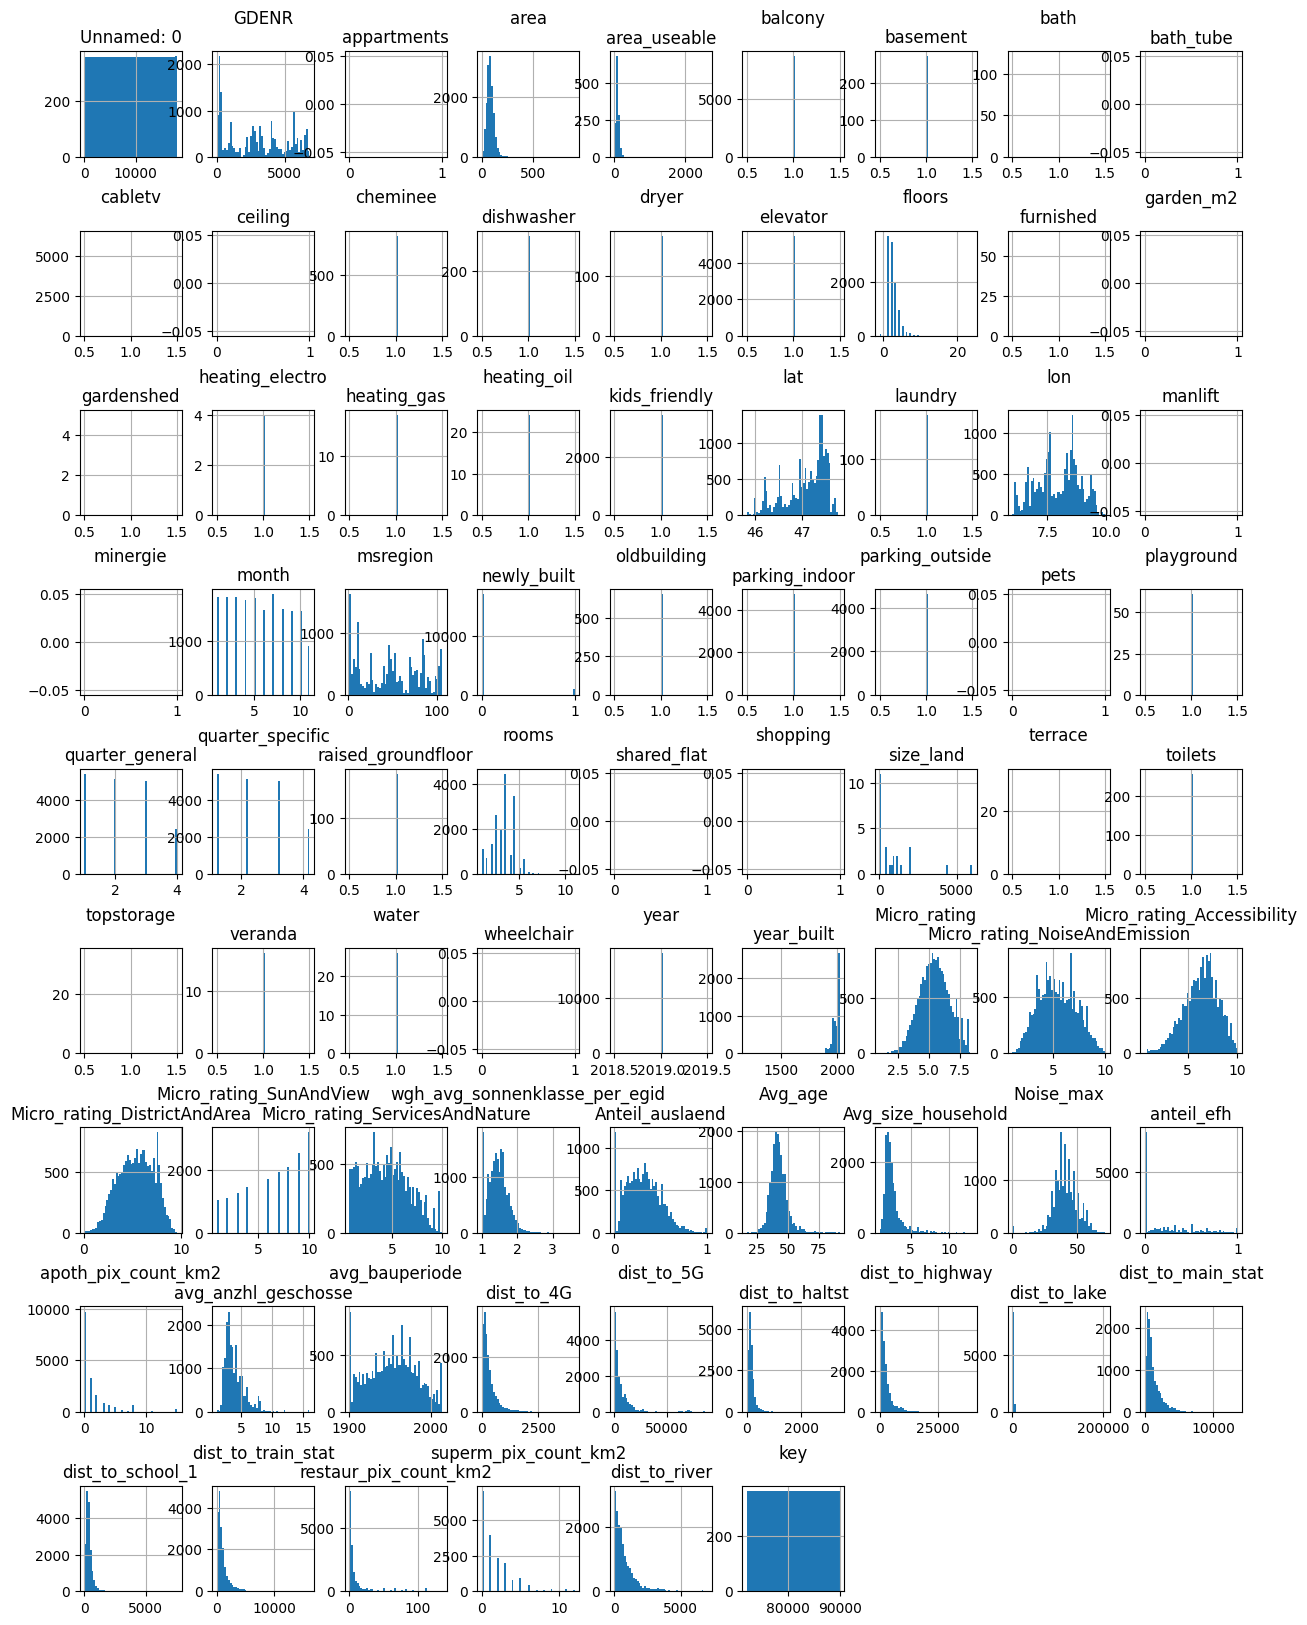

In [31]:
# Graphical Overview

axes = data.hist(bins=50, figsize=(15, 20))
plt.subplots_adjust(hspace=0.7)

# Iterate through the generated axes and adjust every second title
for i, ax in enumerate(axes.flatten()):
    if i % 2 == 1:
        title = ax.get_title()
        ax.set_title(title, pad=20) # pad: distance between title and plot

plt.show()


# Data Cleaning

In [115]:
# Delete all columns with only one value inside

for key in data.columns.tolist():
    if data[f"{key}"].unique().shape[0] == 1:
        data.drop(f"{key}", axis=1, inplace=True)


In [116]:
# Create a new column "min_area" being the minimum of area and area_usable

data['min_area'] = np.fmin(data['area'], data['area_useable'])

# Check for NaN values in min_area
print(data[data['min_area'].isna()].shape)
data[data['min_area'].isna()].head()


(13625, 86)


Unnamed: 0    GDENAMK  GDENR KTKZ                           address  area  \
11          12  Solothurn   2601   SO                    4500 Solothurn   NaN   
14          15     Bülach     53   ZH  Lindenhofstrasse 12, 8180 Bülach   NaN   
21          22       Thun    942   BE       Tanneggweg 12, 3604 Thun BE   NaN   
24          25  Ottenbach     11   ZH                 8913 Ottenbach ZH   NaN   
26          27       Belp    861   BE      Belpbergstrasse 3, 3123 Belp   NaN   

    area_useable  balcony  basement  bath  cabletv  cheminee        date  \
11           NaN      NaN       NaN   NaN      NaN       NaN  07.10.2019   
14           NaN      1.0       NaN   NaN      NaN       NaN  07.03.2019   
21           NaN      1.0       NaN   NaN      1.0       NaN  28.06.2019   
24           NaN      NaN       NaN   NaN      1.0       NaN  07.08.2019   
26           NaN      NaN       NaN   NaN      NaN       NaN  23.05.2019   

                                                descr  dishwasher  dryer  \
11                                                NaN         NaN    NaN   
14                                                NaN         NaN    NaN   
21  Wir vermieten per sofort oder nach Vereinbarun...         NaN    NaN   
24  Suchen Sie die perfekte, moderne und private W...         NaN    NaN   
26  Die Belpbergstrasse 3 liegt sehr zentral in Be...         NaN    NaN   

    elevator  floors  furnished  gardenshed heating_air heating_earth  \
11       NaN    12.0        NaN         NaN         NaN           NaN   
14       NaN     3.0        NaN         NaN         NaN           NaN   
21       NaN     2.0        NaN         NaN         NaN           NaN   
24       NaN     2.0        NaN         NaN         NaN           NaN   
26       NaN     2.0        NaN         NaN         NaN           NaN   

    heating_electro heating_far  heating_gas  heating_oil heating_pellets  \
11              NaN         NaN          NaN          NaN             NaN   
14              NaN         NaN          NaN          NaN             NaN   
21              NaN         NaN          NaN          NaN             NaN   
24              NaN         NaN          NaN          NaN             NaN   
26              NaN         NaN          NaN          NaN             NaN   

      home_type  kids_friendly        lat  laundry       lon manlift  \
11      Wohnung            NaN  47.208135      NaN  7.538405     NaN   
14      Wohnung            1.0  47.520010      NaN  8.538086     NaN   
21      Wohnung            NaN  46.735686      NaN  7.609991     NaN   
24  Dachwohnung            NaN  47.281720      NaN  8.406092     NaN   
26      Wohnung            NaN  46.889650      NaN  7.498969     NaN   

   middle_house  month  msregion  newly_built  oldbuilding oven  \
11          NaN     10        46            0          NaN  NaN   
14          NaN      3        10            0          NaN  NaN   
21          NaN      6        20            0          NaN  NaN   
24          NaN      8         4            0          NaN  NaN   
26          NaN      5        11            0          NaN  NaN   

    parking_indoor  parking_outside  playground pool  quarter_general  \
11             NaN              NaN         NaN  NaN                4   
14             NaN              1.0         NaN  NaN                1   
21             1.0              NaN         NaN  NaN                2   
24             NaN              NaN         NaN  NaN                3   
26             NaN              NaN         NaN  NaN                2   

    quarter_specific quiet  raised_groundfloor  rent_full  rooms shower  \
11            4.2019   NaN                 NaN       1190    3.5    NaN   
14            1.2019   NaN                 NaN       1236    3.0    NaN   
21            2.2019   NaN                 NaN       1530    3.0    NaN   
24            3.2019   NaN                 NaN       2500    4.5    NaN   
26            2.2019   NaN                 NaN     

In [117]:
# Check for NaN values in min_area and rooms

print(data[data['min_area'].isna() & data['rooms'].isna()].shape)

# If rooms is not available either, drop the row
data = data.drop(data[(data['min_area'].isna()) & (data['rooms'].isna())].index)


(702, 86)


In [118]:
print(data[data['min_area'].isna()].shape)


(12923, 86)


In [119]:
#Imputing missing values for min_area by using the average min_area
# of the 200 nearest neighbors with the same number of rooms

# Standardizing lat and lon
data[['lat', 'lon']] = StandardScaler().fit_transform(data[['lat', 'lon']])

# Initialize NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=200)
neighbors.fit(data[['lat', 'lon']])

# Iterate over rows with NaN 'min_area'
for idx, row in data[data['min_area'].isna()].iterrows():
    distances, indices = neighbors.kneighbors([row[['lat', 'lon']]])
    relevant_indices = indices.flatten()

    # Filter neighbors with the same number of rooms
    same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]

    # Calculate average 'min_area' from these neighbors
    avg_min_area = same_room_neighbors['min_area'].mean()

    # Impute the 'min_area'
    data.at[idx, 'min_area'] = avg_min_area


/home/mo/.pyenv/versions/3.11.3/envs/swissrentenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/tmp/ipykernel_967/1888449172.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]
/home/mo/.pyenv/versions/3.11.3/envs/swissrentenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/tmp/ipykernel_967/1888449172.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  same_room_neighbors = data.iloc[relevant_indices][data['rooms'] == row['rooms']]
/home/mo/.pyenv/versions/3.11.3/envs/swissrentenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors w

In [120]:
# Now we still have NaN values in min_area
# This is because sometimes there are no neighbors with the same number of rooms

print(data[data['min_area'].isna()].shape)

# We drop these rows
data = data.drop(data[data['min_area'].isna()].index)


(87, 86)


In [121]:
# Replace NaN with 0

# We drop manlift because it is not available in the test data
# data.drop(['manlift'])

nan0_list = ['balcony', 'basement', 'cabletv', 'cheminee', 'dishwasher', 'dryer',
             'elevator', 'furnished', 'gardenshed', 'heating_air', 'heating_earth',
             'heating_far', 'heating_electro', 'heating_gas', 'heating_oil', 'heating_pellets',
             'kids_friendly', 'laundry', 'middle_house', 'oldbuilding',
             'oven', 'parking_indoor', 'parking_outside', 'playground', 'pool',
             'quiet', 'raised_groundfloor', 'shower', 'size_land', 'sunny', 'terrace',
             'topstorage', 'veranda', 'water']
data.update({item: data[item].fillna(0) for item in nan0_list})

nan1_list = ['bath', 'floors', 'toilets']
data.update({item: data[item].fillna(1) for item in nan1_list})


In [122]:
# Drop rows that are not valuable to regression

low_val_list = ['Unnamed: 0', 'area', 'area_useable', 'descr', 'GDENAMK', 'GDENR',
                 'KTKZ', 'address',  'date', 'quarter_general', 'quarter_specific',
                   'month']
data.drop(columns=low_val_list, inplace=True)


In [123]:
# There are still a lot of missing values in rooms (the ones where min_area is not NaN)

data[data['rooms'].isna()].shape


(1142, 74)

In [124]:
# Imputing rooms

# Modify bins to include np.inf for an open-ended last bin
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, np.inf]

# Adjust labels to include an 'Over' label for the open-ended bin
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + [f"Over {bins[-2]}"]

# Apply the cut function to create the 'area_group' column
data['area_group'] = pd.cut(data['min_area'], bins=bins, labels=labels)

# Step 2: Group by 'area_group' and calculate the mean of 'rooms'
mean_rooms_by_area_group = data.groupby('area_group')['rooms'].mean()

# Step 3: Replace NaN values in 'rooms' with the mean rooms of the corresponding 'area_group'
data['rooms'] = data.groupby('area_group')['rooms'].transform(lambda x: x.fillna(x.mean()))

# Rows with min_area over 300 don't have room numbers listed so we try an educated guess

# Step 4: Filter the dataset for 'min_area' between 200 and 300
group_200_to_300 = data[(data['min_area'] >= 200) & (data['min_area'] < 300)]

# Calculate the average rooms per square meter for this group
avg_rooms_per_sqm_200_to_300 = (group_200_to_300['rooms'] / group_200_to_300['min_area']).dropna().mean()

# Step 5: Apply this average rooms per square meter to estimate the room number for larger estates with 'min_area' over 300
data.loc[data['min_area'] > 300, 'rooms'] = data['min_area'] * avg_rooms_per_sqm_200_to_300

# Round for all rooms to .5
data['rooms'] = data['rooms'].apply(lambda x: np.round(x * 2) / 2)


/tmp/ipykernel_967/4046949422.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rooms_by_area_group = data.groupby('area_group')['rooms'].mean()
/tmp/ipykernel_967/4046949422.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['rooms'] = data.groupby('area_group')['rooms'].transform(lambda x: x.fillna(x.mean()))


In [125]:
#Create dummy variables for home_type

data['home_type'] = data['home_type'].astype('category')

# Count and display unique values of the 'home_type' column
home_type_counts = data['home_type'].value_counts()
unique_home_types = data['home_type'].unique()

print("Count of each unique home_type:")
print(home_type_counts)

print("\nUnique home_types:")
print(unique_home_types)

data = pd.get_dummies(data, columns=['home_type'], prefix='home')


Count of each unique home_type:
home_type
Wohnung             61766
Dachwohnung          2840
Maisonette           2471
Attika               1634
Studio               1441
Terrassenwohnung      682
Loft                  371
Ferienwohnung           6
Name: count, dtype: int64

Unique home_types:
['Wohnung', 'Attika', 'Dachwohnung', 'Studio', 'Maisonette', 'Terrassenwohnung', 'Loft', 'Ferienwohnung']
Categories (8, object): ['Attika', 'Dachwohnung', 'Ferienwohnung', 'Loft', 'Maisonette', 'Studio', 'Terrassenwohnung', 'Wohnung']


In [126]:
# Replace NaNs by mean value for columns with only limited missing values

columns_to_process = ['Anteil_auslaend', 'Avg_age', 'Avg_size_household',
                      'anteil_efh', 'wgh_avg_sonnenklasse_per_egid',
                      'avg_anzhl_geschosse', 'avg_bauperiode',
                      'dist_to_school_1', 'dist_to_haltst', 'dist_to_lake',
                      'dist_to_main_stat']

for column in columns_to_process:

    # Replace with mean by msregion
    mean_by_msregion = data.groupby('msregion')[column].transform('mean')

    # Replace missing values in the current column with the corresponding mean of the 'msregion'
    data[column] = data[column].fillna(mean_by_msregion)


In [127]:
# Impute NaNs of year_built with avg bauperiode of region

data['year_built'] = data['year_built'].fillna(data['avg_bauperiode'])


In [128]:
# Count rows with NaN values

nan_list = data.isna().sum()

# Check for NaNs

pd.set_option('display.max_rows', None)
nan_list


balcony                               0
basement                              0
bath                                  0
cabletv                               0
cheminee                              0
dishwasher                            0
dryer                                 0
elevator                              0
floors                                0
furnished                             0
gardenshed                            0
heating_air                           0
heating_earth                         0
heating_electro                       0
heating_far                           0
heating_gas                           0
heating_oil                           0
heating_pellets                       0
kids_friendly                         0
lat                                   0
laundry                               0
lon                                   0
manlift                           71210
middle_house                          0
msregion                              0


In [129]:
# There are only 2 columns with NaNs left: dist_to_lake and dist_to_main_stat
# We drop these columns

data.drop(['dist_to_lake', 'dist_to_main_stat'], axis=1, inplace=True)


In [130]:
# create new column m2 price to check for validity

data['price_m2'] = data['rent_full'] / data['min_area']


In [131]:
# display distribution to identify outliers or 0 values

print('-' * 30)
columns_of_interest = ['rent_full','min_area', 'price_m2', 'year_built', 'lat', 'lon']

for column in columns_of_interest:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(data[column]):
        # Print column name, minimum, maximum, mean, and standard deviation values
        print(f"Column: {column}")
        print(f"Minimum Value: {data[column].min()}")
        print(f"Maximum Value: {data[column].max()}")
        print(f"Mean Value: {data[column].mean()}")
        print(f"Standard Deviation: {data[column].std()}")

        print("=" * 30)


------------------------------
Column: rent_full
Minimum Value: 55
Maximum Value: 7800
Mean Value: 1682.0640490935389
Standard Deviation: 678.3510931880594
Column: min_area
Minimum Value: 1.0
Maximum Value: 945.0
Mean Value: 81.55994632503307
Standard Deviation: 33.091100000459654
Column: price_m2
Minimum Value: 1.0317460317460319
Maximum Value: 2435.0
Mean Value: 23.016030110028385
Standard Deviation: 36.45908405306085
Column: year_built
Minimum Value: 1087.0
Maximum Value: 2021.0
Mean Value: 1960.8101827124865
Standard Deviation: 40.59825296956372
Column: lat
Minimum Value: -2.834416629597751
Maximum Value: 1.652897837744885
Mean Value: 0.00014518829406131122
Standard Deviation: 0.9999619814639754
Column: lon
Minimum Value: -2.1824034286243688
Maximum Value: 2.2098369541315774
Mean Value: -0.0001229903266402511
Standard Deviation: 1.0000427917339425


In [132]:
# Get an idea of the min_areas in the respective area_group

for area_group in data['area_group'].unique():

    area_group_data = data[data['area_group'] == area_group]

    mean_value = area_group_data['min_area'].mean()

    count = area_group_data['min_area'].count()

    print(area_group, mean_value, count)


80-99 90.09756418723397 16864
20-39 31.941488433990443 5765
100-119 110.30092665770344 10373
160-179 171.04231922188578 646
60-79 70.81344331613145 18979
40-59 52.6907333797018 11467
120-139 129.93325876685753 3926
140-159 150.14527328321952 1696
0-19 15.303125368210205 943
180-199 192.7959198355601 278
200-219 212.4327731092437 119
Over 300 467.3181818181818 22
220-239 231.9864406779661 59
240-259 251.42028985507247 46
280-299 294.5 14
260-279 276.5 14


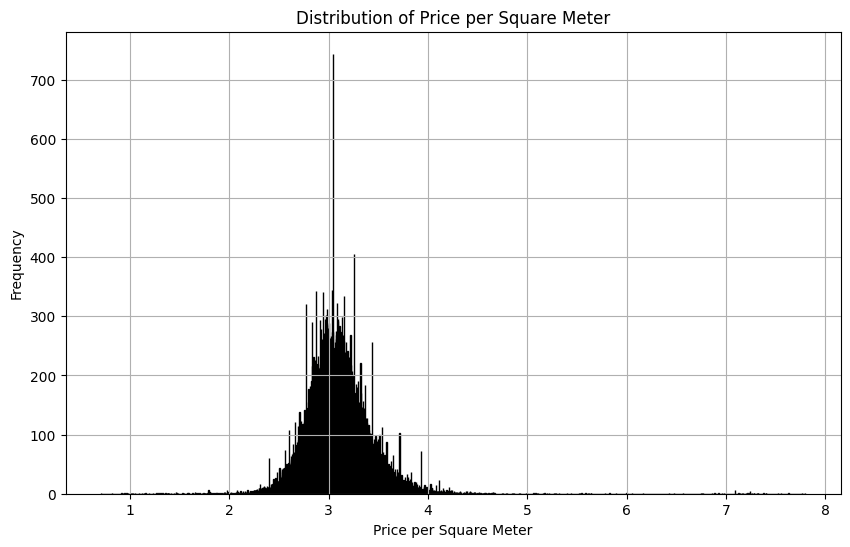

In [133]:
# Assuming 'data' is your DataFrame and 'price_m2' is already cleaned as per your previous code

plt.figure(figsize=(10, 6))

# Create a histogram
plt.hist(np.log1p(data['price_m2']), bins=3000, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Price per Square Meter')
plt.xlabel('Price per Square Meter')
plt.ylabel('Frequency')

# Optional: Adding a grid for better readability
plt.grid(True)

# Display the plot
plt.show()


In [134]:
# Clean outliers - 3 * standard deviation from mean

columns_to_clean_std = ['price_m2']

for column in columns_to_clean_std:

    if column == 'price_m2':
        data['price_m2'] = np.log1p(data['price_m2']) # to account for skewness

    # Calculate mean and standard deviation
    mean_value = data[column].mean()
    print(f'Mean Value of {column} is {np.expm1(mean_value)}')
    std_value = data[column].std()
    print(f'Std Deviation of {column} is {np.expm1(std_value)}')

    # Calculate the number of values more than 3 standard deviations away from the mean
    num_outliers = ((data[column] - mean_value).abs() > 3 * std_value).sum()
    print(f"Number of values more than 3 standard deviations away from the mean in {column}:", num_outliers, "-> have been dropped")

    # Drop rows where the value is more than 2 standard deviations away from the mean
    data = data[(data[column] - mean_value).abs() <= 2 * std_value]

    print()

data['price_m2'] = np.expm1(data['price_m2']) #retransform price_m2

# Display the cleaned DataFrame
print("Shape of DataFrame after cleaning:", data.shape)


Mean Value of price_m2 is 20.994440798039882
Std Deviation of price_m2 is 0.3907332815082569
Number of values more than 3 standard deviations away from the mean in price_m2: 670 -> have been dropped

Shape of DataFrame after cleaning: (68383, 81)


In [135]:
# Again display distribution to identify outliers or 0 values

print('-' * 30)
columns_of_interest = ['rent_full','min_area', 'price_m2', 'year_built', 'lat', 'lon']

for column in columns_of_interest:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(data[column]):
        # Print column name, minimum, maximum, mean, and standard deviation values
        print(f"Column: {column}")
        print(f"Minimum Value: {data[column].min()}")
        print(f"Maximum Value: {data[column].max()}")
        print(f"Mean Value: {data[column].mean()}")
        print(f"Standard Deviation: {data[column].std()}")

        print("=" * 30)


------------------------------
Column: rent_full
Minimum Value: 120
Maximum Value: 7000
Mean Value: 1687.561601567641
Standard Deviation: 656.375365072785
Column: min_area
Minimum Value: 10.0
Maximum Value: 360.0
Mean Value: 82.40052326330351
Standard Deviation: 31.012188730013378
Column: price_m2
Minimum Value: 10.372340425531915
Maximum Value: 41.53846153846155
Mean Value: 21.385515522962645
Standard Deviation: 5.920608413250998
Column: year_built
Minimum Value: 1087.0
Maximum Value: 2021.0
Mean Value: 1961.5180435387126
Standard Deviation: 40.27280832424317
Column: lat
Minimum Value: -2.834416629597751
Maximum Value: 1.652897837744885
Mean Value: 0.008039589149299031
Standard Deviation: 0.9941324627066139
Column: lon
Minimum Value: -2.1824034286243688
Maximum Value: 2.2098369541315774
Mean Value: 0.008819692133463739
Standard Deviation: 0.9944255081252141


In [136]:
# Convert binary columns to numeric

column_list = ['heating_air', 'heating_earth', 'heating_far', 'heating_pellets',
               'middle_house', 'oven', 'pool', 'quiet', 'shower', 'sunny']

for column in column_list:
    data[column] = pd.to_numeric(data[column], errors='coerce').astype('int')


In [143]:
# data.drop(['area_group'], axis=1, inplace=True)
# data.drop(['manlift'], axis=1, inplace=True)
# data.drop(['price_m2'], axis=1, inplace=True)

data.to_csv('data/prep_train.csv', index=False)


In [149]:
train_data = data.copy()


In [68]:
test_data.shape


(17801, 78)

In [150]:
train_columns = set(train_data.columns.tolist())
test_columns = set(test_data.columns.tolist())

# Find the columns that are in train_data but not in test_data
columns_missing_in_test = train_columns - test_columns

# Find the columns that are in test_data but not in train_data
columns_missing_in_train = test_columns - train_columns

# Print the mismatched columns
if columns_missing_in_test:
    print("Columns missing in test_data but present in train_data:")
    print(columns_missing_in_test)

if columns_missing_in_train:
    print("Columns missing in train_data but present in test_data:")
    print(columns_missing_in_train)


Columns missing in test_data but present in train_data:
{'rent_full'}


## Disclaimer:
Since we're going to focus on decision trees and random forest, we don't nee to
standardize or normalize our data.

# Different models 

## Imports for Predictions

In [58]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV


## Linear Regression

Mean Cross-Validated MSE: 163230.61243419506
Standard Deviation of Cross-Validated MSE: 4583.432935438368
Root Mean Squared Error: 399.10489394253455
R^2 Score: 0.6251379411899591


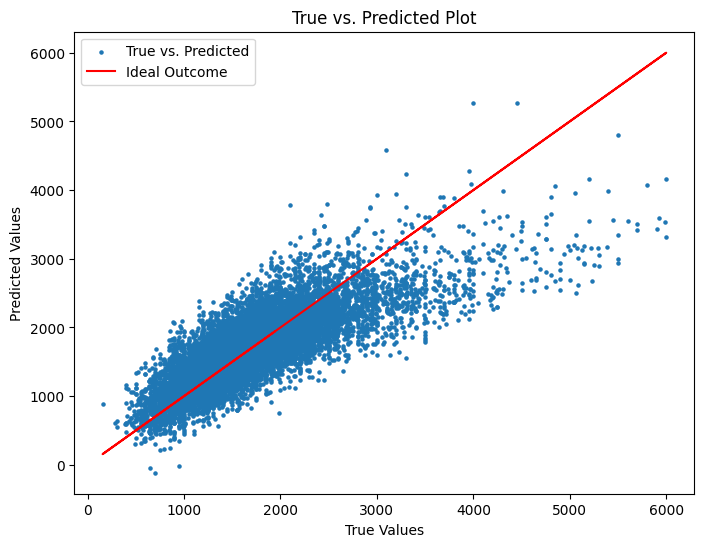

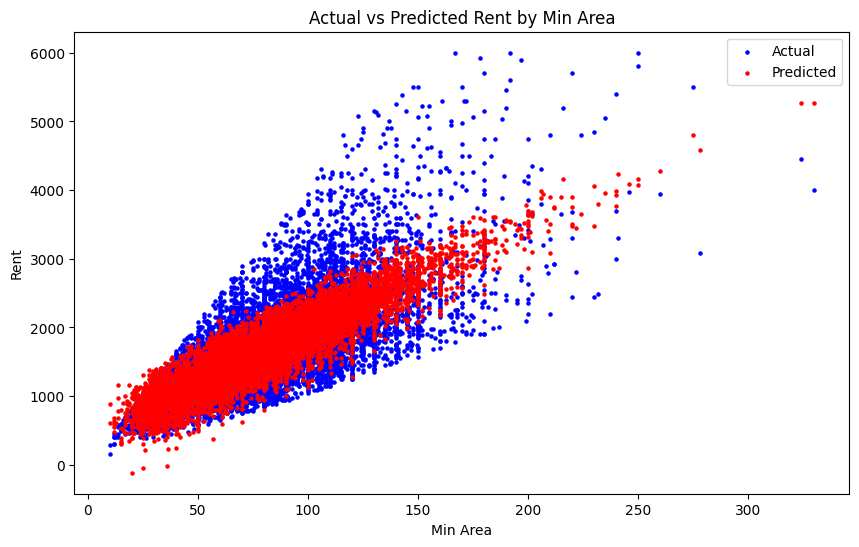

In [28]:
#Linear regression

# Drop some more columns
drop_list = ['lat', 'lon', 'area_group', 'key', 'avg_bauperiode', 'price_m2']

data_copy = data.copy()

data_copy.drop(columns=drop_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = LinearRegression()

# Cross-validate the model
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Plotting the predicted vs. true values

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)

# Line for ideal outcome (True values = Predicted values)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')

# Labels and Legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()



# Plotting the actual vs predicted values for min_area

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)

# Scatter plot for predicted values
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)

# Labels and Legend
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


## Random Forest

Mean Cross-Validated MSE: 87107.14745677773
Standard Deviation of Cross-Validated MSE: 4219.234937943393
Root Mean Squared Error: 292.3476462241825
R^2 Score: 0.7988608628918652
Feature Importance: [1.43042052e-03 1.26300529e-04 0.00000000e+00 9.88041440e-04
 8.23554176e-04 1.05496801e-04 4.37294936e-05 3.68314199e-03
 6.19511963e-03 5.55065003e-05 1.66842470e-07 4.82716201e-06
 7.83977485e-06 2.03707264e-06 6.93044001e-06 2.49749066e-05
 7.98430328e-06 1.23258198e-06 6.88481911e-04 3.69478154e-02
 5.93787369e-05 8.29286747e-02 2.32710246e-07 2.15801218e-06
 8.96715153e-02 2.58510803e-04 3.24364734e-04 6.81092631e-05
 9.59745153e-04 1.11870867e-03 3.13416709e-05 1.42734376e-05
 5.24618469e-06 8.98124222e-05 1.44145097e-02 3.58095087e-10
 6.74720886e-04 2.82459116e-06 7.07517658e-05 0.00000000e+00
 6.67155486e-06 2.07499212e-05 1.99103496e-05 2.50232366e-02
 6.98731294e-03 6.28828769e-03 6.59462920e-03 1.69913552e-02
 3.45989484e-03 6.55387502e-03 7.37666550e-03 9.12777036e-03
 8.530533

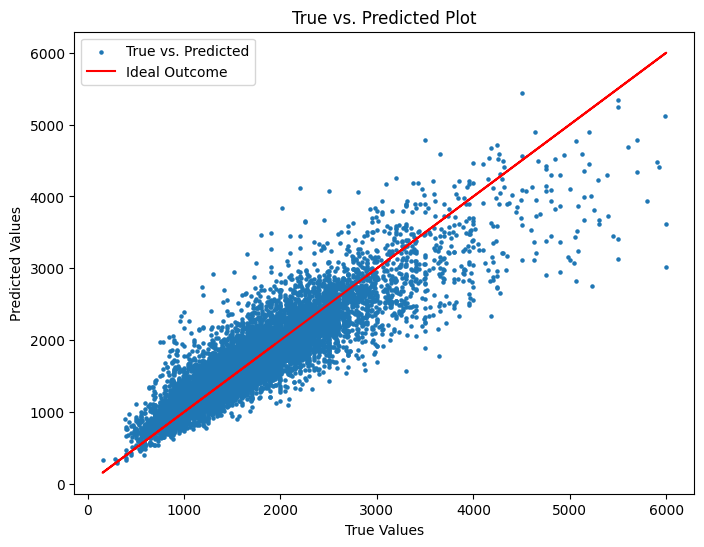

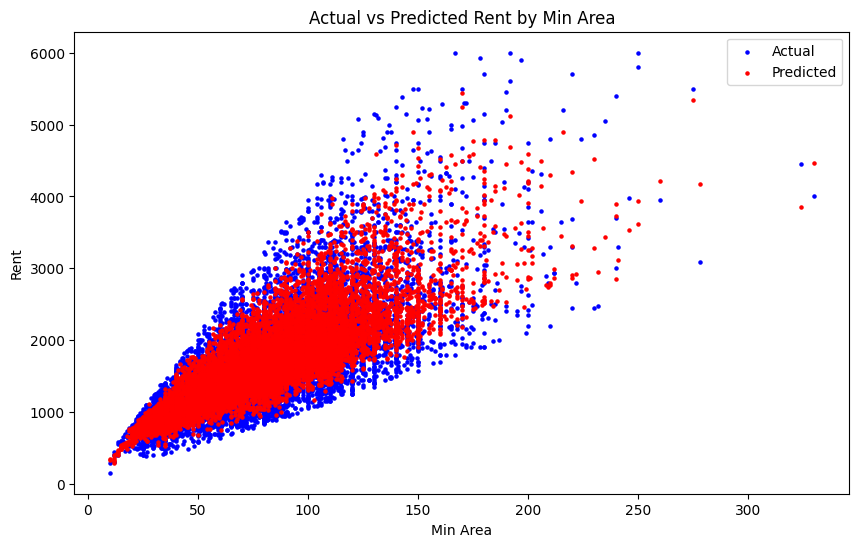

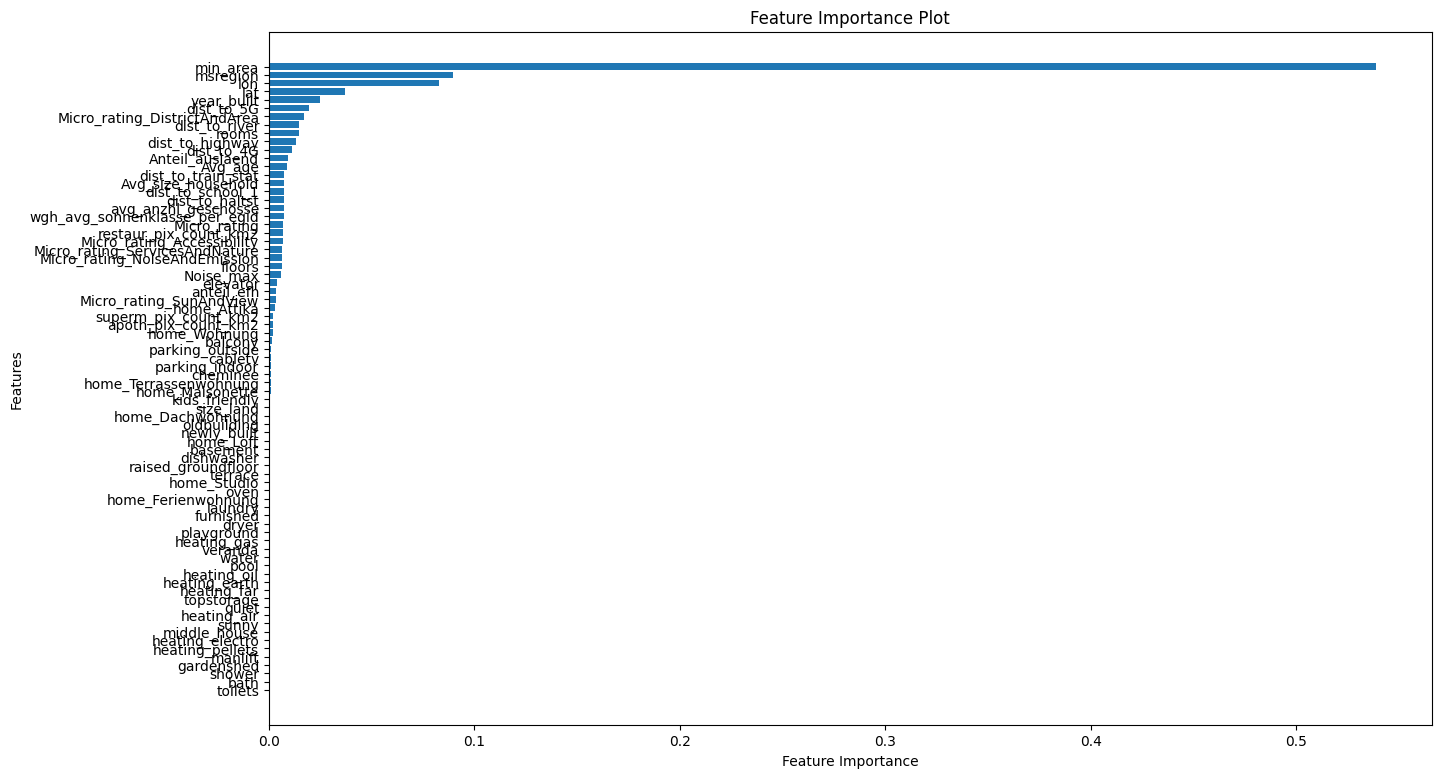

In [29]:
#Drop some more features

drop_micros_list = ['area_group', 'key', 'avg_bauperiode', 'price_m2']

data_copy = data.copy()

data_copy.drop(columns=drop_micros_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = RandomForestRegressor(n_estimators=100)

# Cross-validate the model
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print("Feature Importance:", model.feature_importances_)

# Plotting the predicted vs. true values

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)

# Line for ideal outcome (True values = Predicted values)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')

# Labels and Legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()


# Plotting the actual vs predicted values for min_area

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)

# Scatter plot for predicted values
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)

# Labels and Legend
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


# Horizontal bar plot of feature importance

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
features = X_train.columns[sorted_idx]

plt.figure(figsize=(15, 9))
plt.barh(features, feature_importance[sorted_idx], height=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


## XGBoost

Mean Cross-Validated MSE: 82161.33344489189
Standard Deviation of Cross-Validated MSE: 3195.3527822481037
Root Mean Squared Error: 281.32986604613404
R^2 Score: 0.8137359428548818


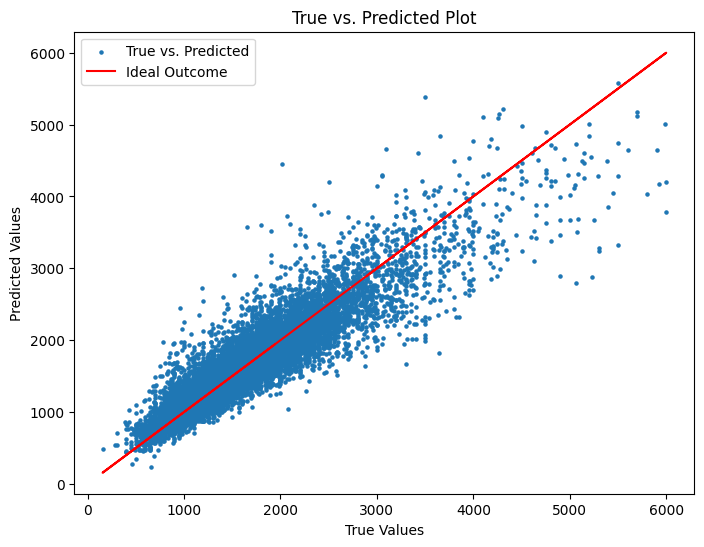

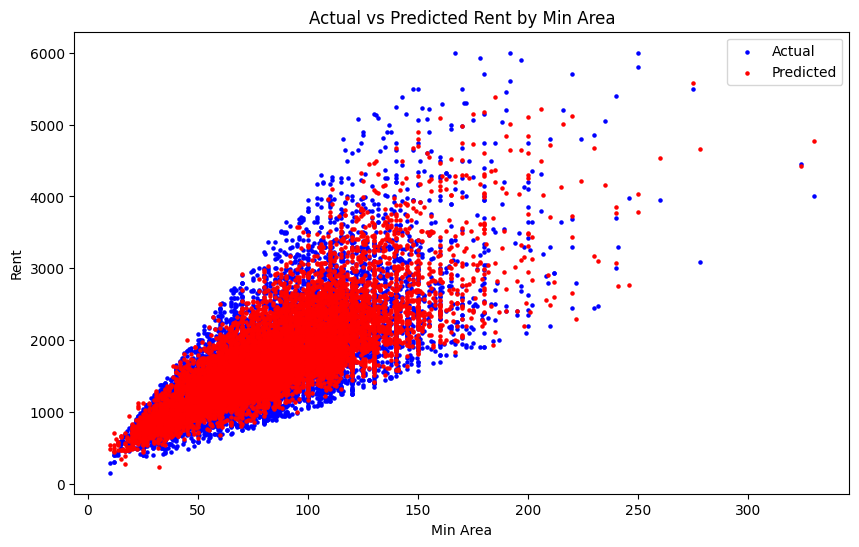

In [151]:
# Drop some more columns
# drop_list = ['lat', 'lon', 'key', 'avg_bauperiode']
drop_list = []
data_copy = train_data.copy()
data_copy.drop(columns=drop_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the XGBoost model
model = XGBRegressor(objective ='reg:squarederror', random_state=0)

# Cross-validate the model
mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Convert scores to positive
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Plotting the predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for min_area
plt.figure(figsize=(10, 6))
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


In [153]:
# Calculate the average of rent_full over the predicted values for the test set
average_predicted_rent_train = np.mean(y_pred)
print(f'Average Predicted Rent (Test Data): {average_predicted_rent_train}')

# Assuming you have a test_data DataFrame with features similar to X
# Predict rent_full on the test_data DataFrame
y_test_data_pred = model.predict(test_data)

# Calculate the average of rent_full over the predicted values for the test_data
average_predicted_rent_test = np.mean(y_test_data_pred)
print(f'Average Predicted Rent (Test Data DataFrame): {average_predicted_rent_test}')


Average Predicted Rent (Test Data): 1690.275634765625
Average Predicted Rent (Test Data DataFrame): 1660.35302734375


## LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.284699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6307
[LightGBM] [Info] Number of data points in the train set: 43765, number of used features: 66
[LightGBM] [Info] Start training from score 1692.151742
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.136765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6300
[LightGBM] [Info] Number of data points in the train set: 43765, number of used features: 66
[LightGBM] [Info] Start training from score 1687.801485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.088077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

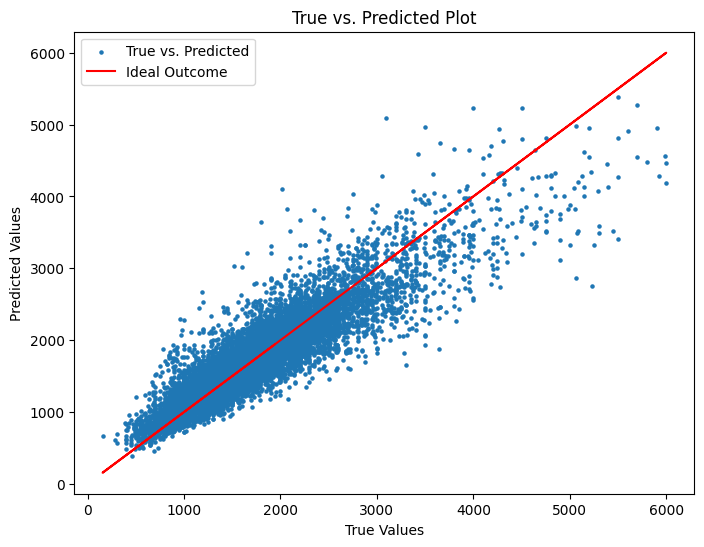

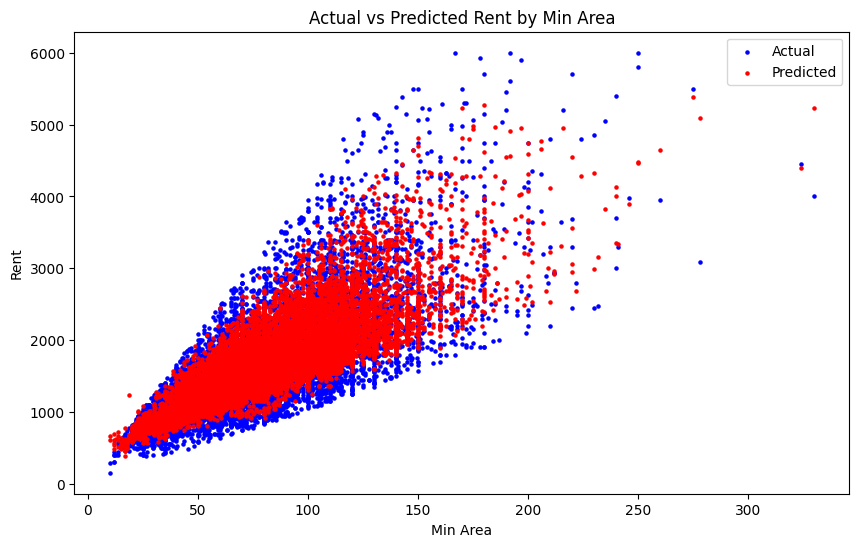

In [155]:
# Drop some columns
# drop_list = ['lat', 'lon', 'area_group', 'key', 'avg_bauperiode', 'price_m2']
drop_list = []
data_copy = data.copy()
data_copy.drop(columns=drop_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [80, 100],
    'learning_rate': [0.1],
    'max_depth': [-1]
}

# Initialize the LGBM model
model = LGBMRegressor(random_state=0)

# Create a GridSearchCV object with the model, parameter grid, and cross-validation settings
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Cross-validate the best model
mse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Convert scores to positive

# Print mean and standard deviation of cross-validated MSE scores for the best model
print(f'Mean Cross-Validated MSE (Best Model): {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE (Best Model): {np.std(mse_scores)}')

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict the target for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate metrics for the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (Best Model): {rmse}')
print(f'R^2 Score (Best Model): {r2}')

# Plotting the predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for min_area
plt.figure(figsize=(10, 6))
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


## Support Vector Machine

In [30]:
#Drop some more features

drop_micros_list = ['area_group', 'key', 'avg_bauperiode', 'price_m2']

data_copy = data.copy()

data_copy.drop(columns=drop_micros_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize SVR without parameter optimization
svr = SVR()

# Cross-validate the SVR model
mse_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model with the training data
svr.fit(X_train, y_train)

# Predict the target for the test set
y_pred = svr.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Plotting the predicted vs. true values

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)

# Line for ideal outcome (True values = Predicted values)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')

# Labels and Legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()


# Plotting the actual vs predicted values for min_area

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)

# Scatter plot for predicted values
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)

# Labels and Legend
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


## Neural Network

In [28]:
#Drop some more features

drop_micros_list = ['area_group', 'key', 'avg_bauperiode', 'price_m2']

data_copy = data.copy()

data_copy.drop(columns=drop_micros_list, inplace=True)

# Let's assume 'X' is our features dataframe and 'y' is our target series
X = data_copy.drop(columns=['rent_full'])
y = data_copy['rent_full']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize MLPRegressor without hyperparameter tuning
mlp = MLPRegressor(max_iter=2000)

# Cross-validate the MLPRegressor model
mse_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive (as cross_val_score returns neg_mean_squared_error)
mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validated MSE scores
print(f'Mean Cross-Validated MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of Cross-Validated MSE: {np.std(mse_scores)}')

# Fit the model with the training data
mlp.fit(X_train, y_train)

# Predict the target for the test set
y_pred = mlp.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


# Plotting the predicted vs. true values

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, label='True vs. Predicted', s=5)

# Line for ideal outcome (True values = Predicted values)
plt.plot(y_test, y_test, color='red', label='Ideal Outcome')

# Labels and Legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Plot')
plt.legend()
plt.show()


# Plotting the actual vs predicted values for min_area

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test['min_area'], y_test, color='blue', label='Actual', s=5)

# Scatter plot for predicted values
plt.scatter(X_test['min_area'], y_pred, color='red', label='Predicted', s=5)

# Labels and Legend
plt.title('Actual vs Predicted Rent by Min Area')
plt.xlabel('Min Area')
plt.ylabel('Rent')
plt.legend()
plt.show()


/home/mo/.pyenv/versions/3.11.3/envs/swissrentenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## Additional Graphs

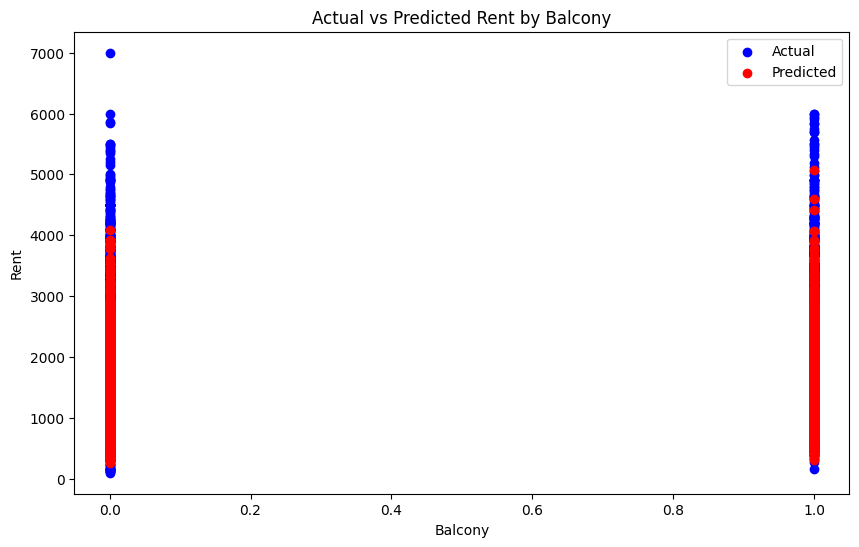

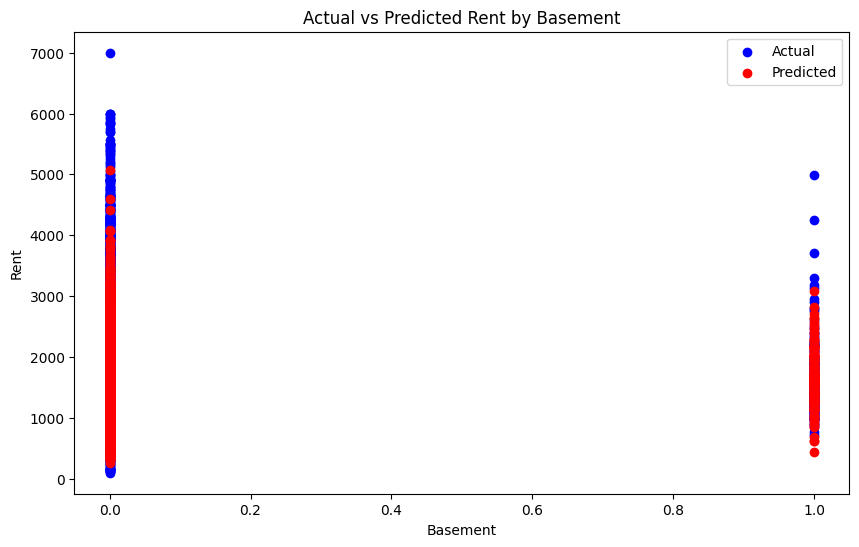

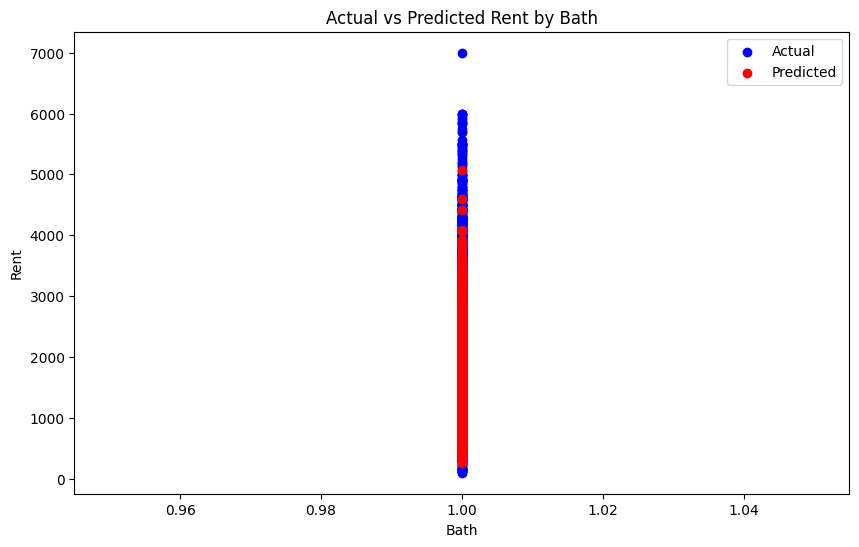

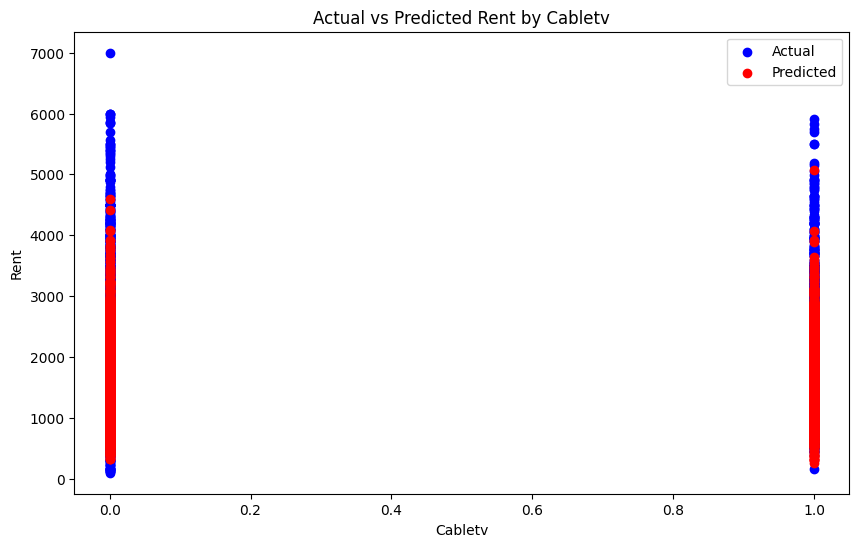

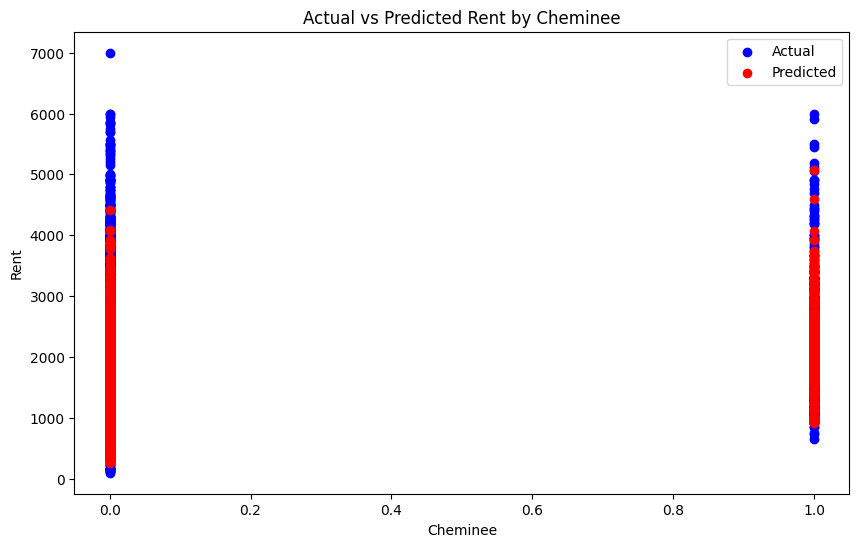

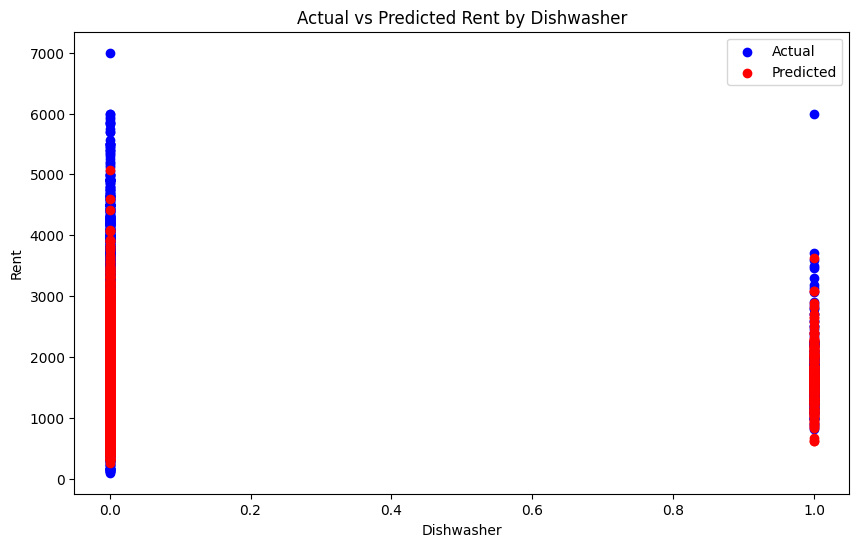

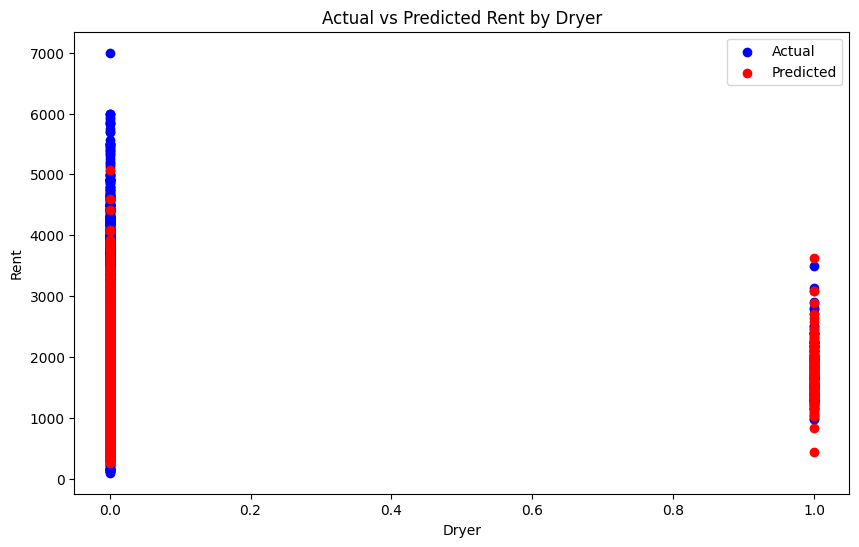

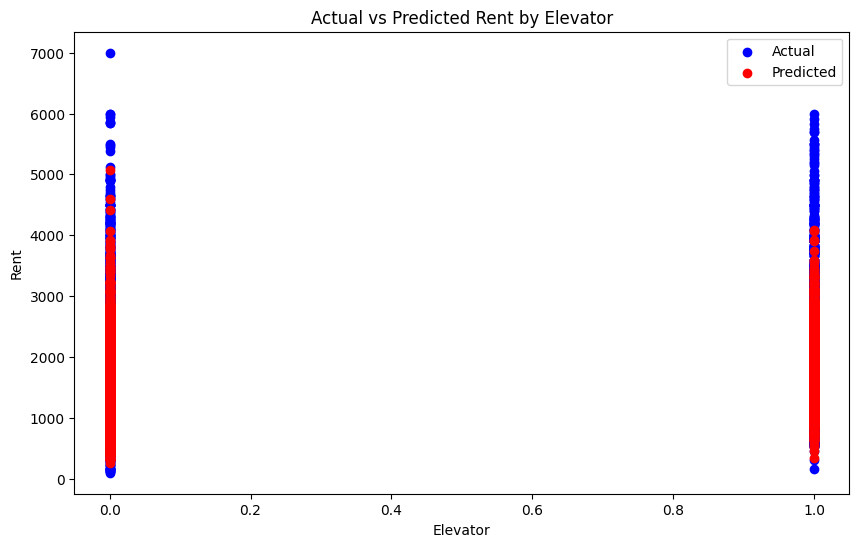

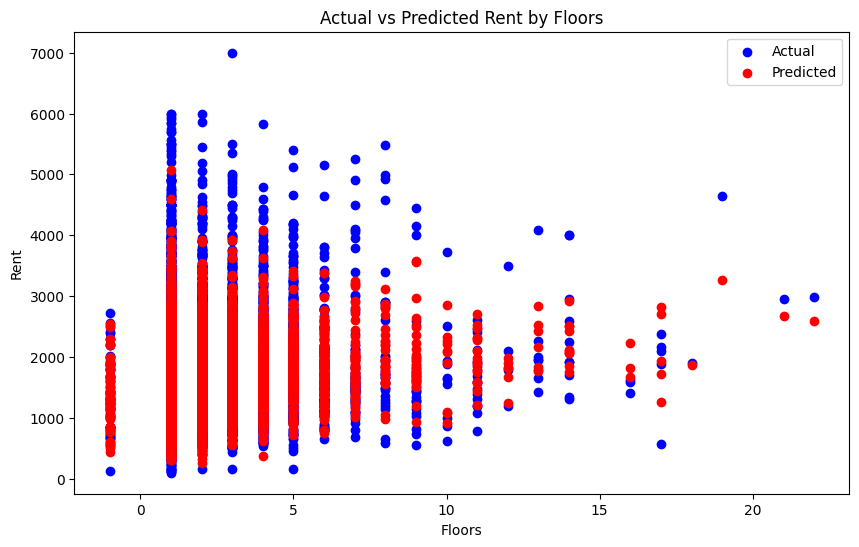

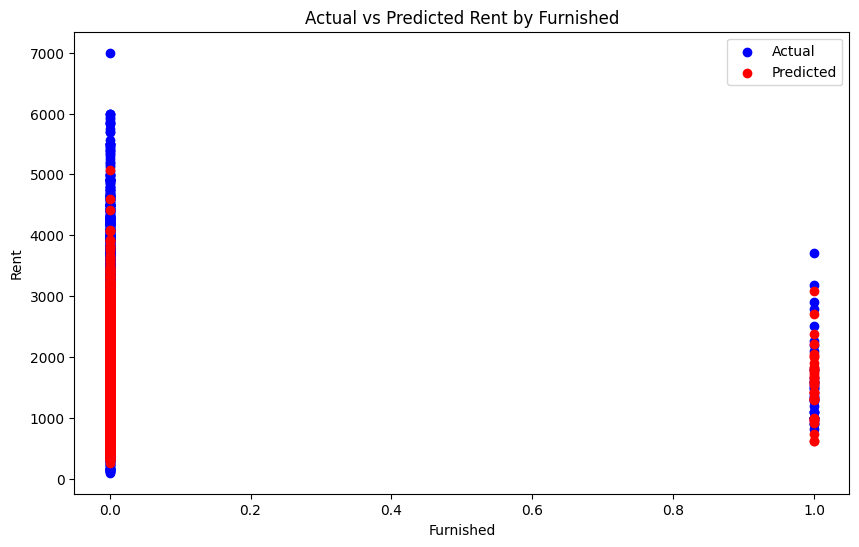

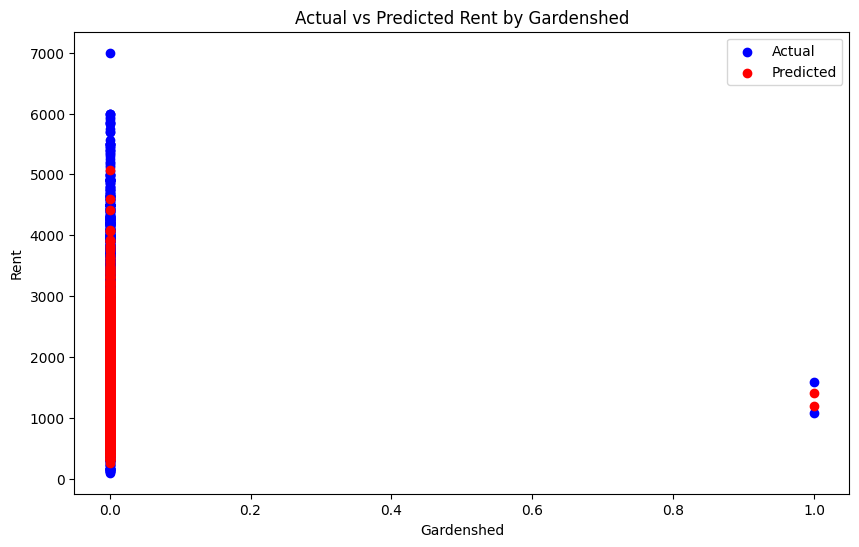

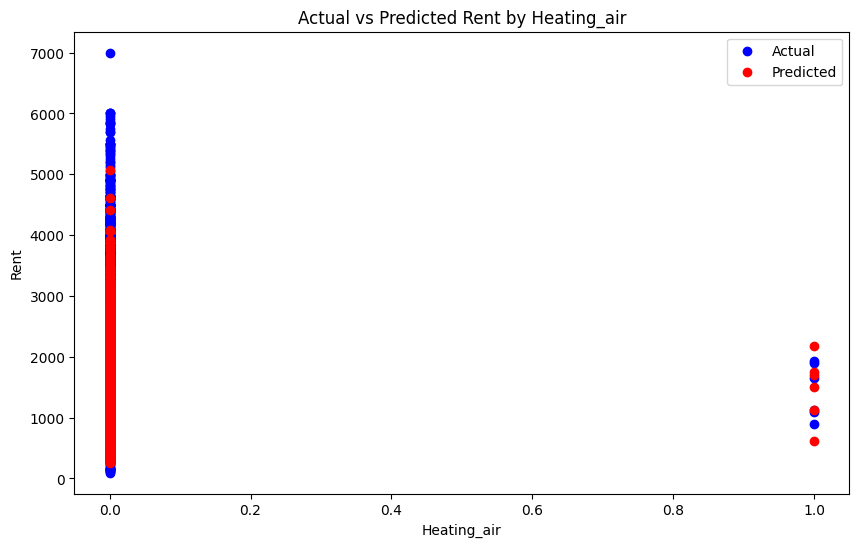

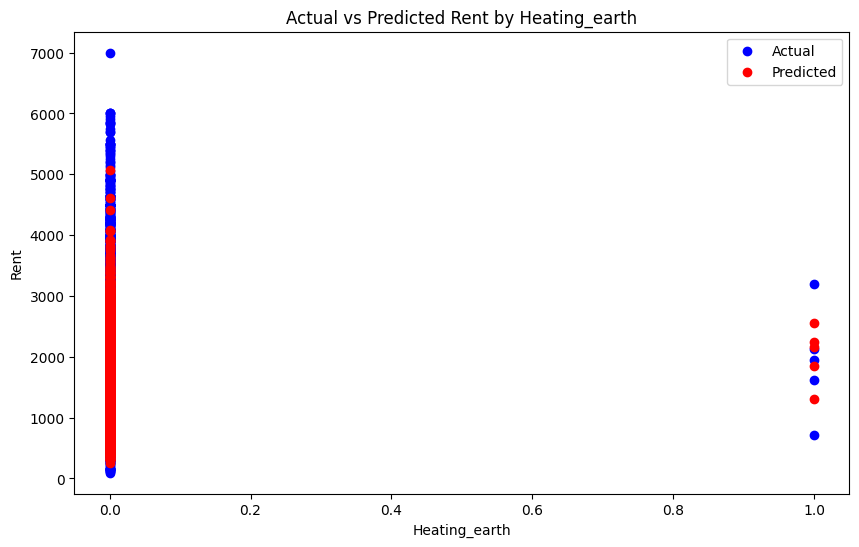

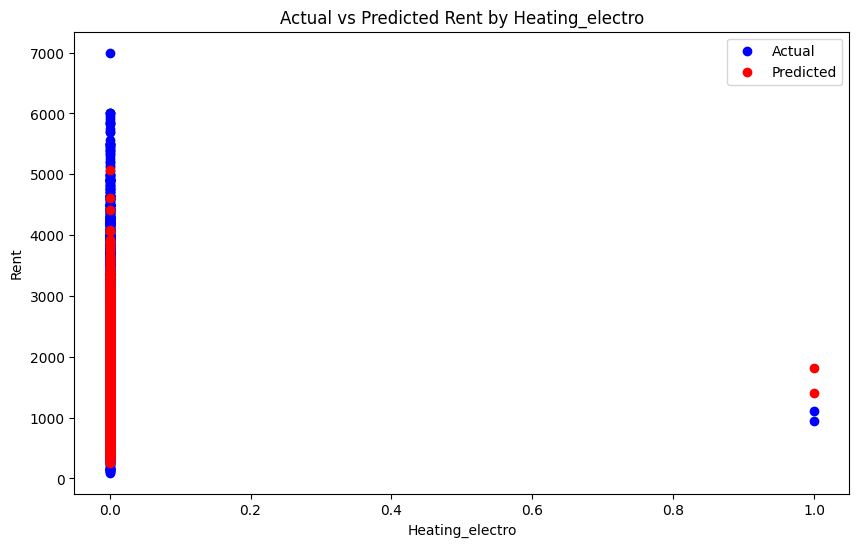

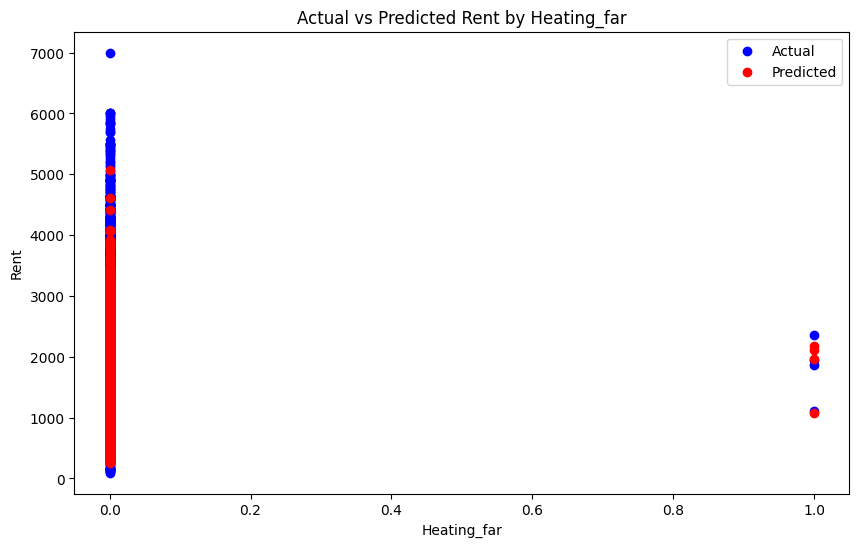

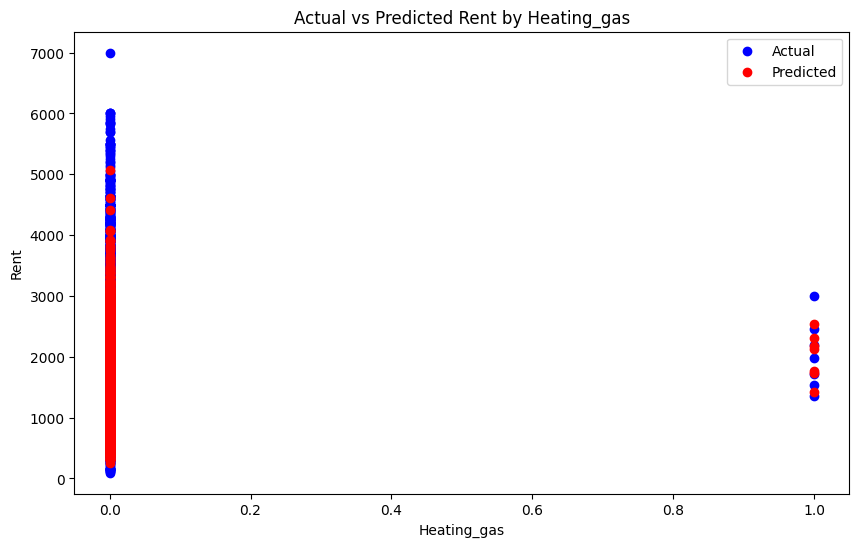

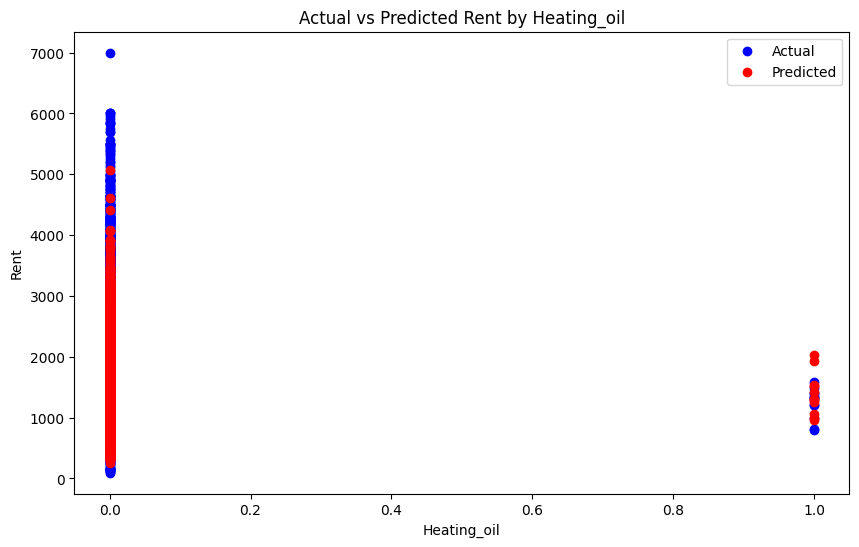

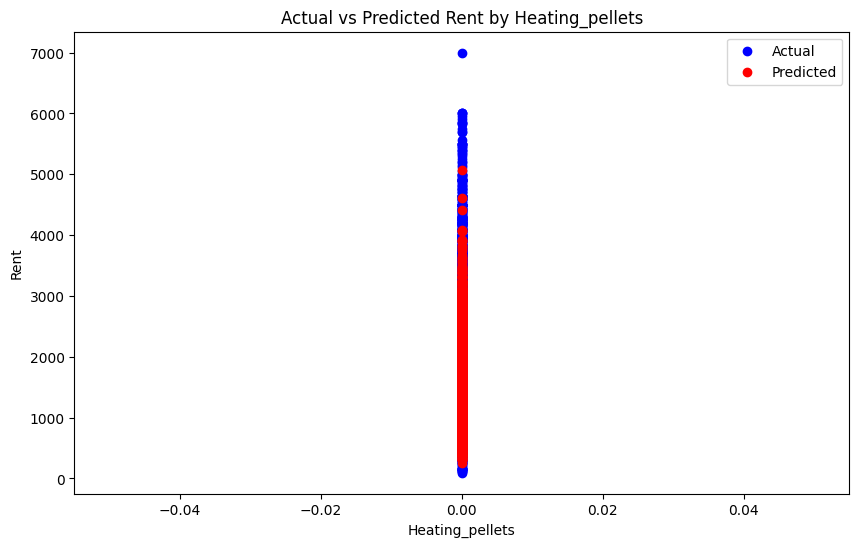

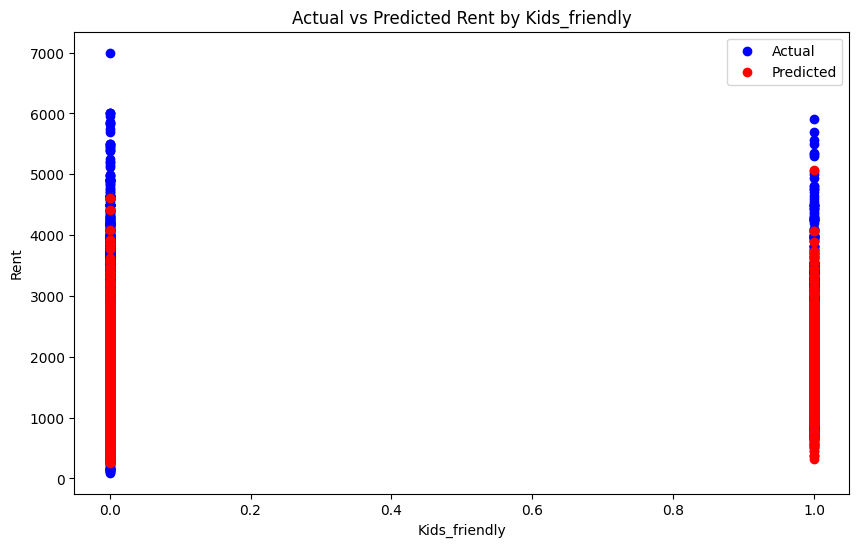

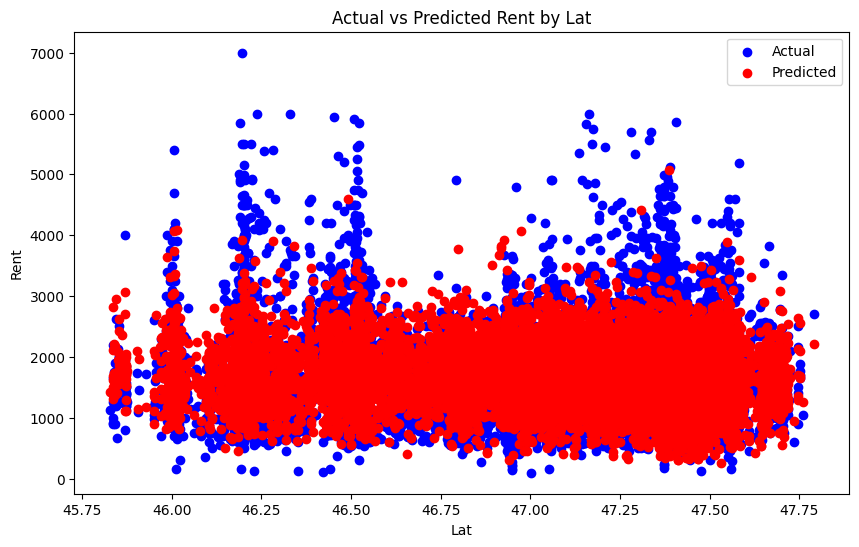

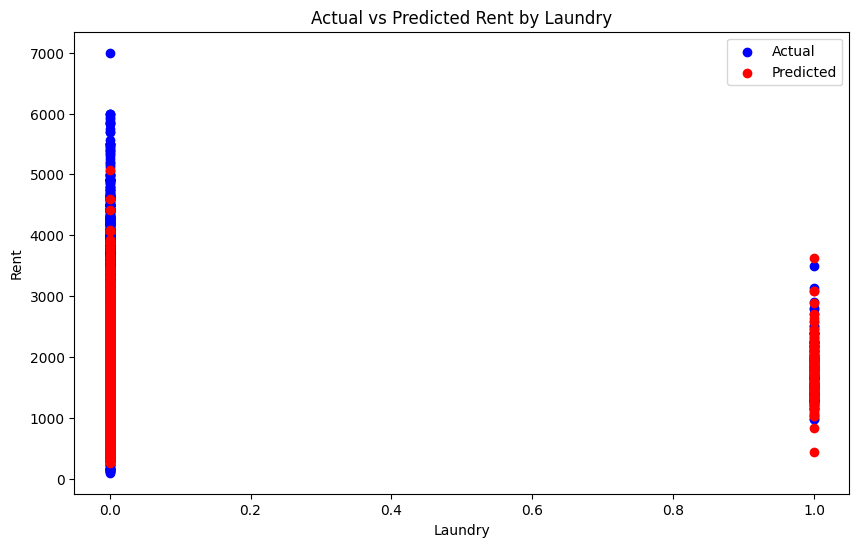

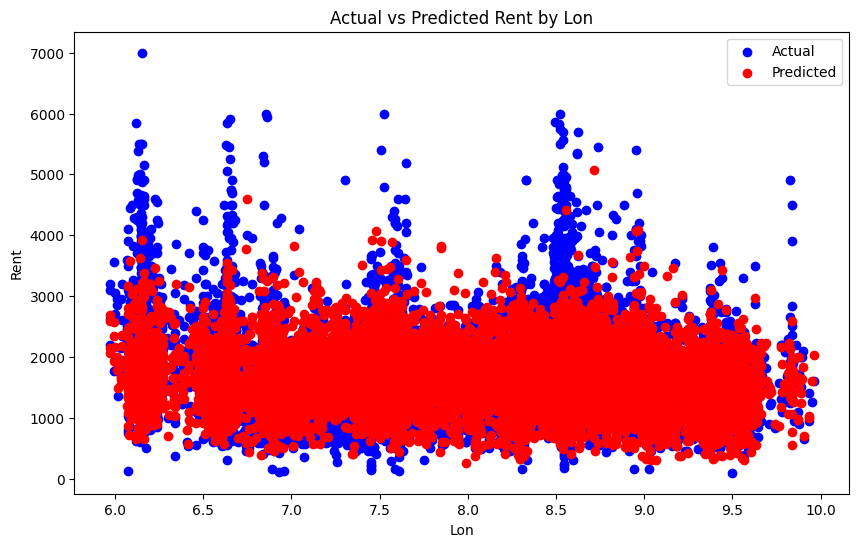

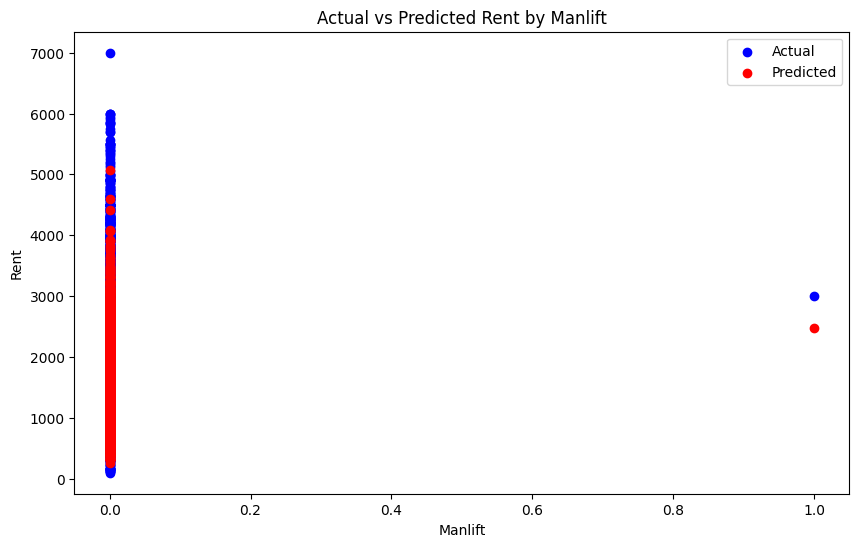

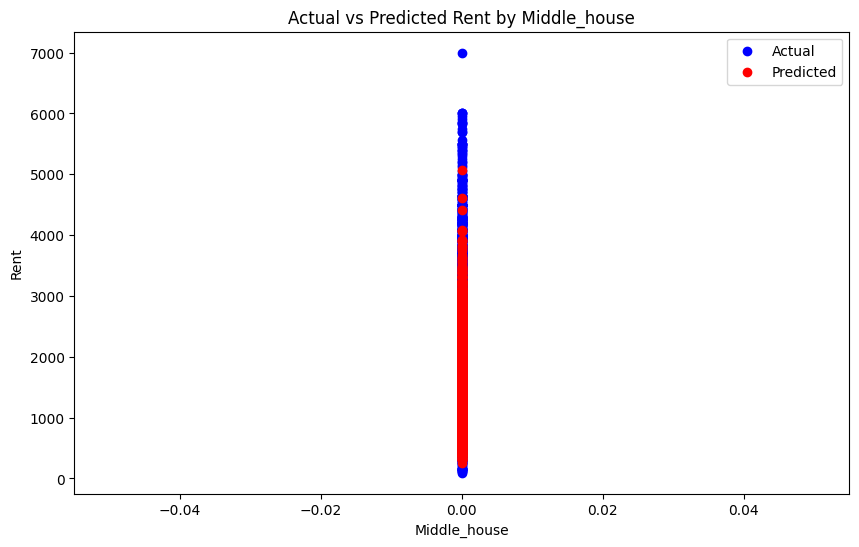

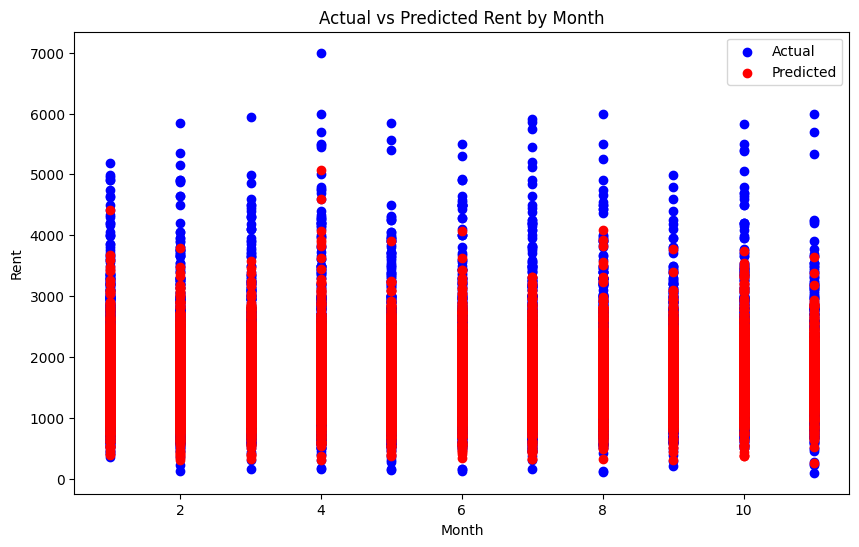

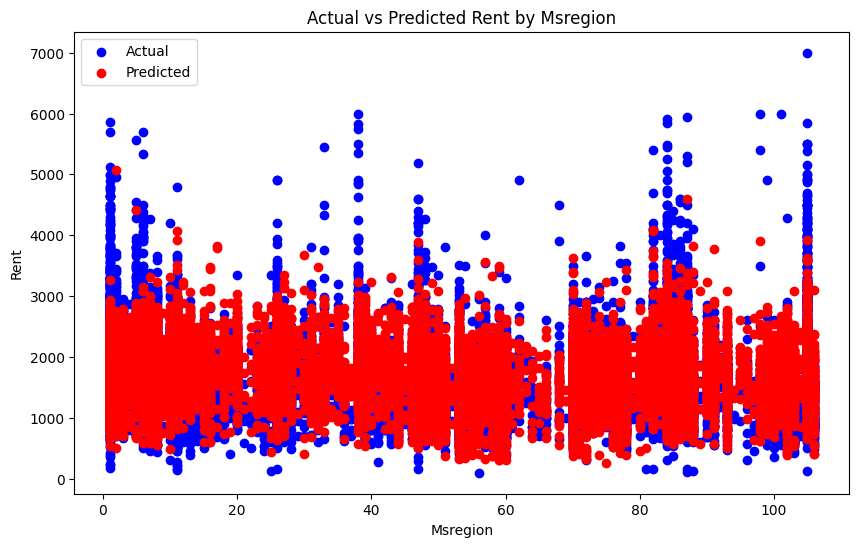

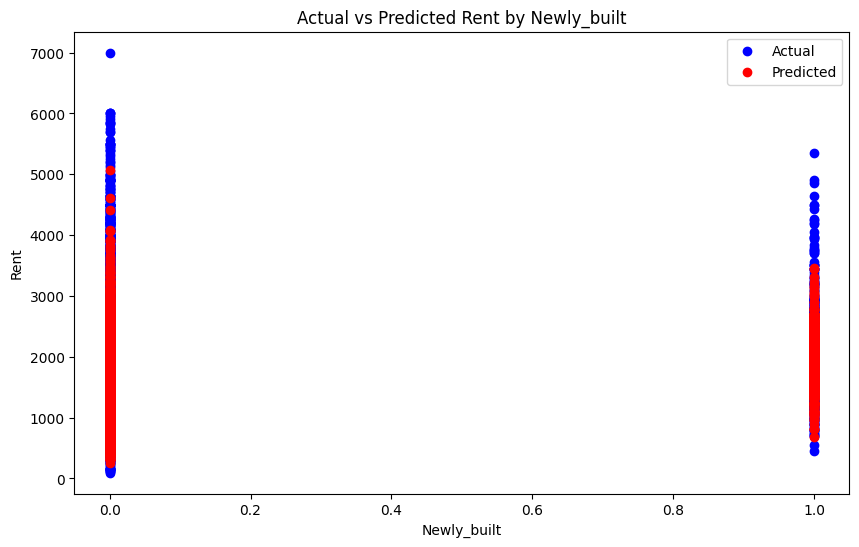

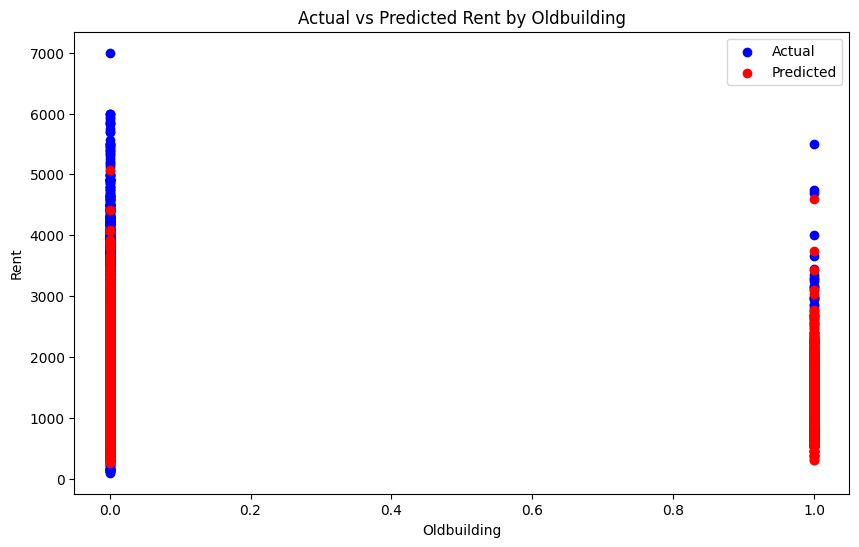

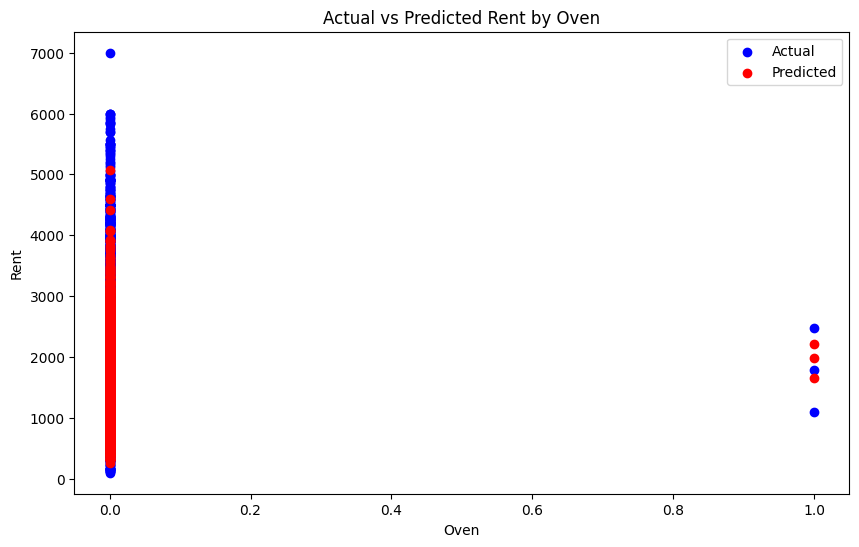

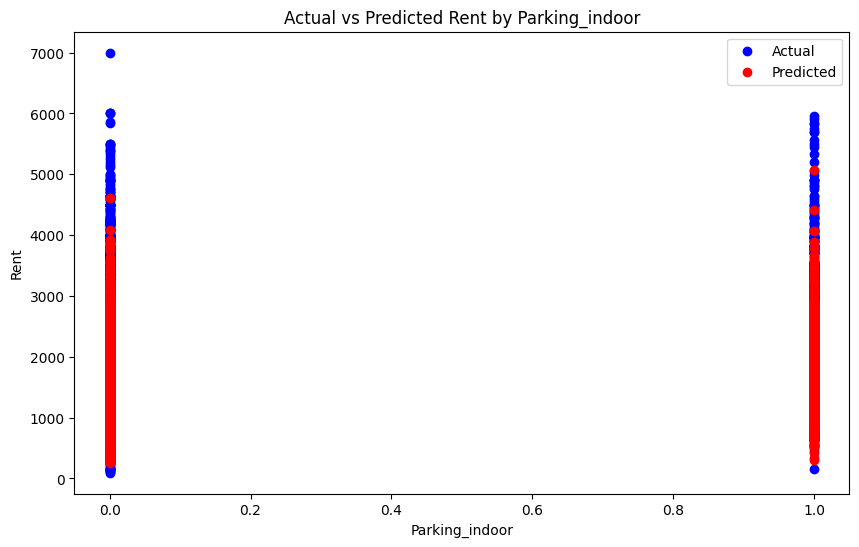

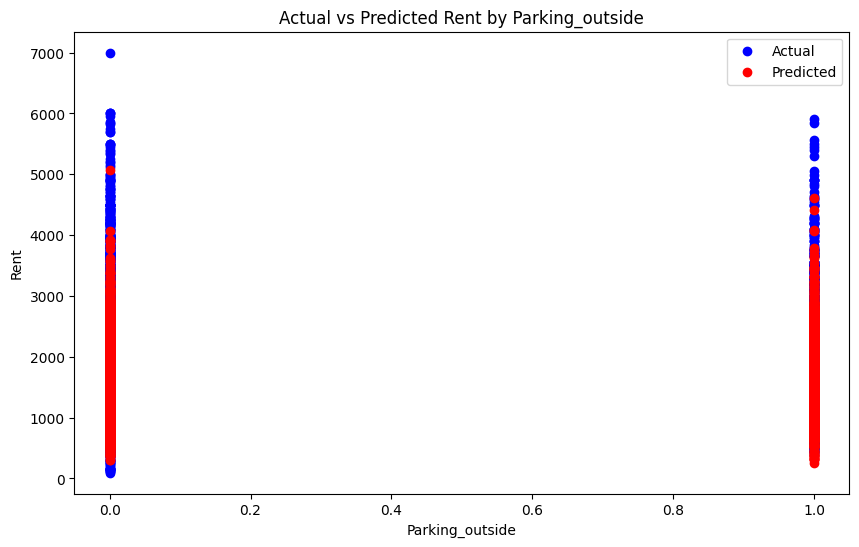

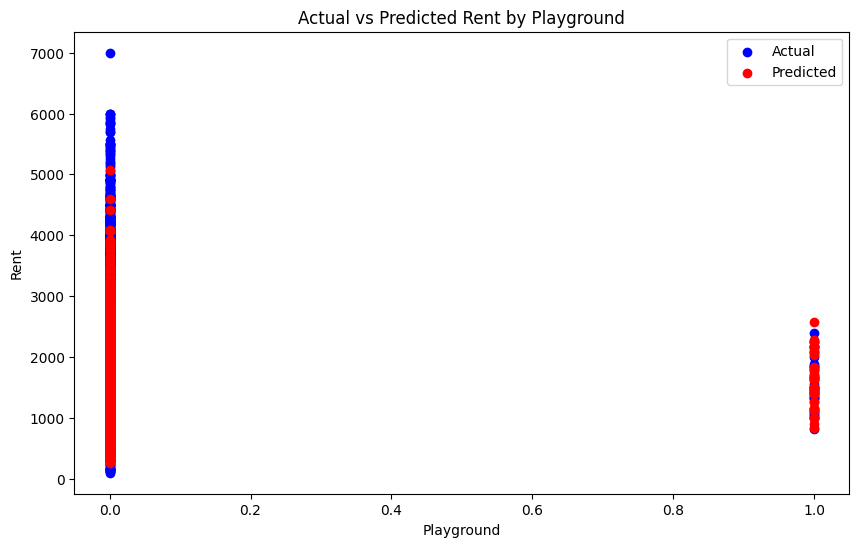

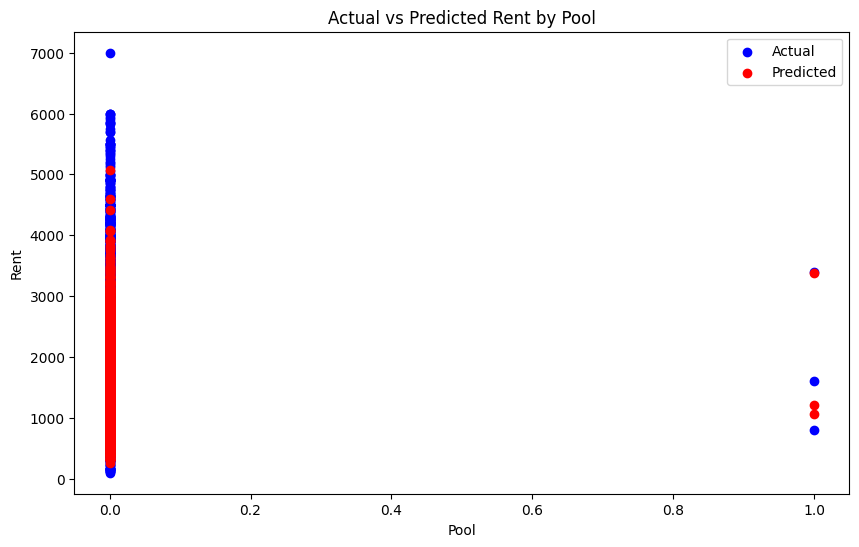

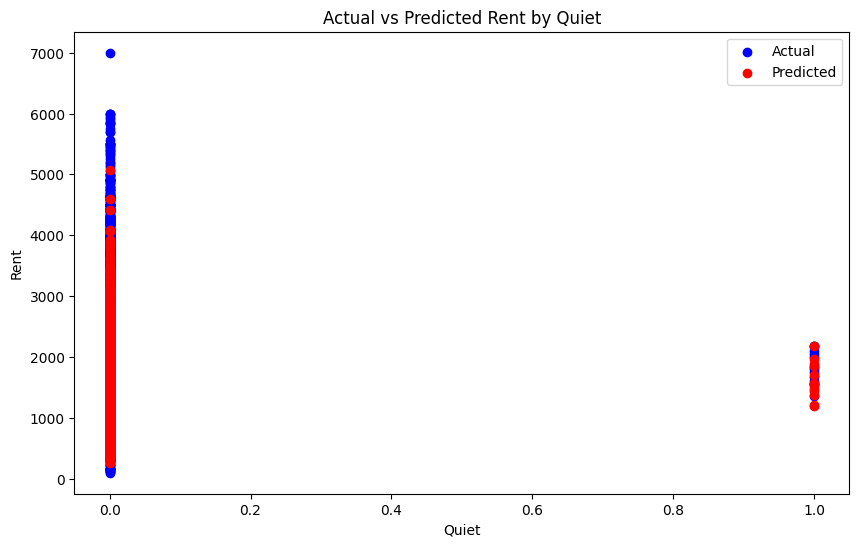

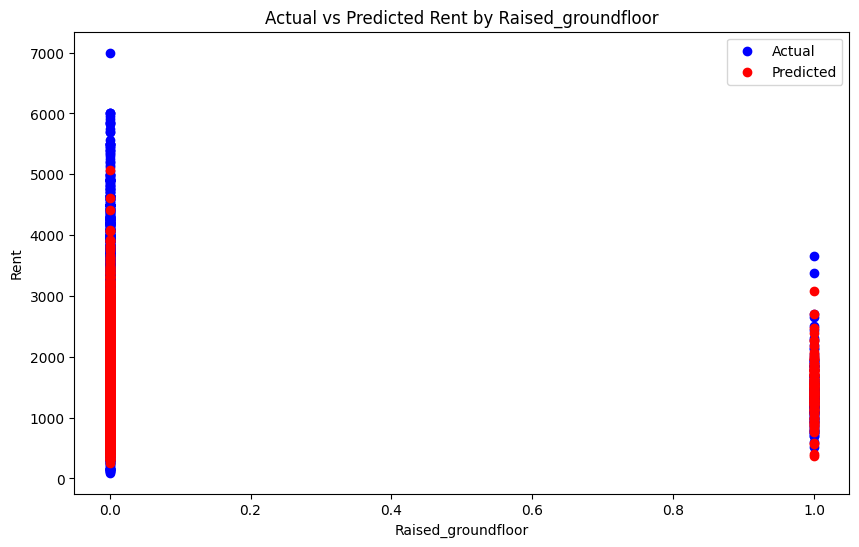

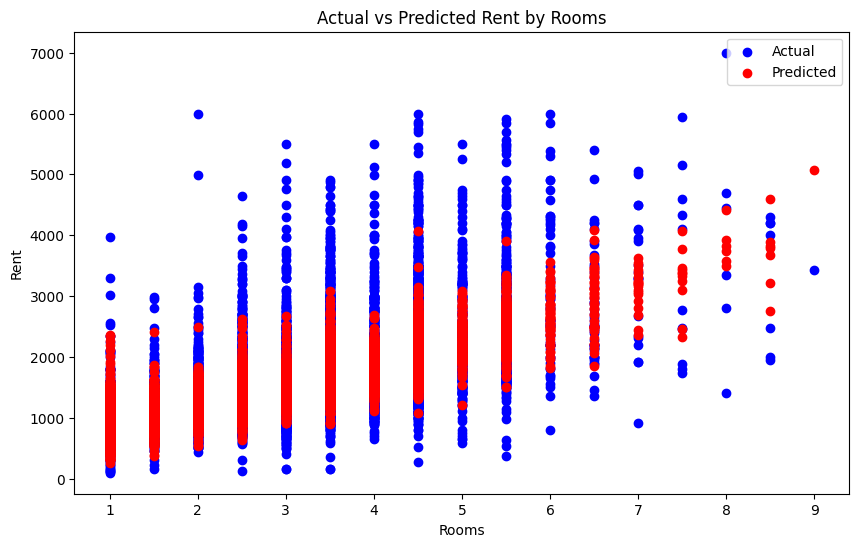

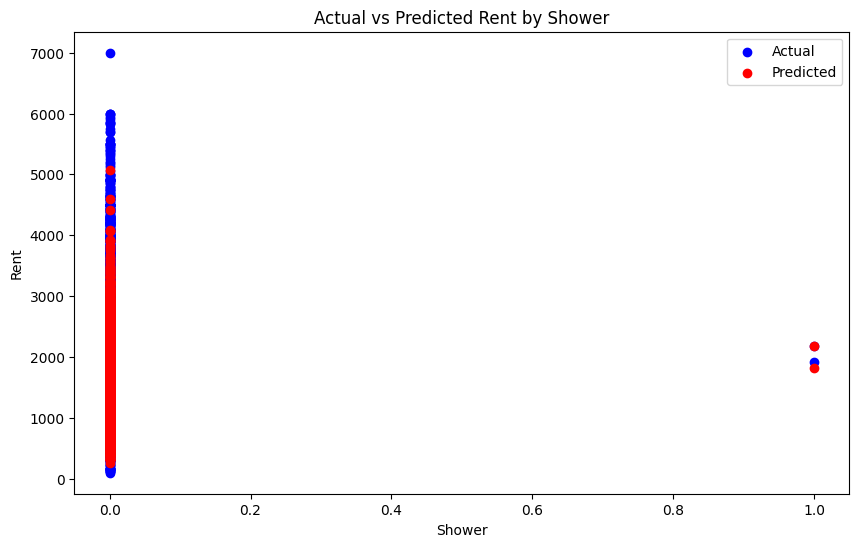

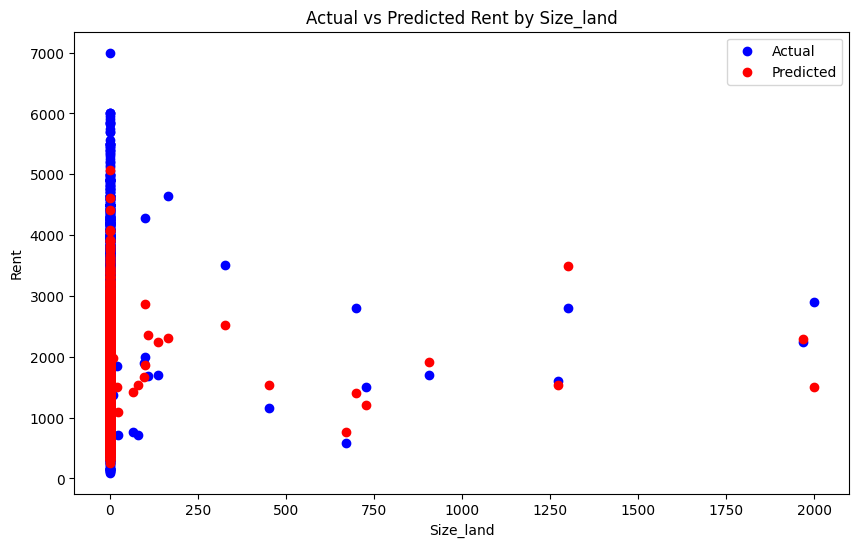

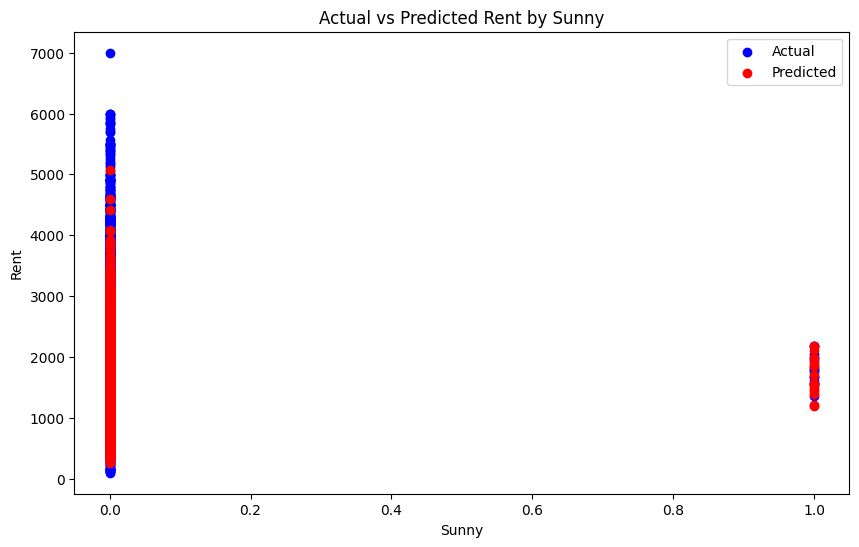

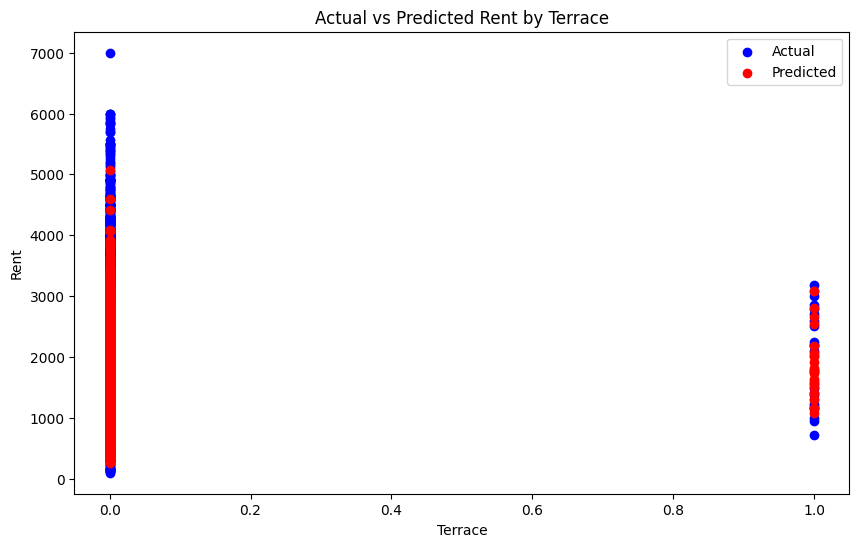

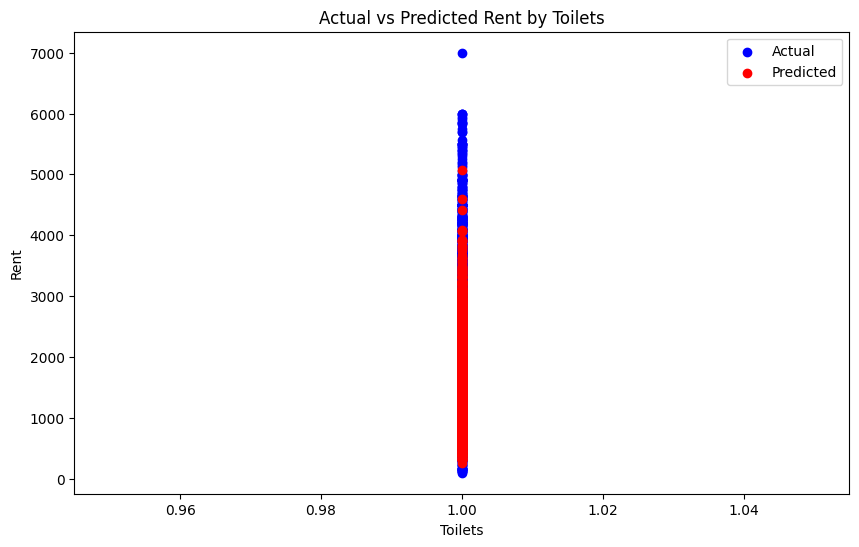

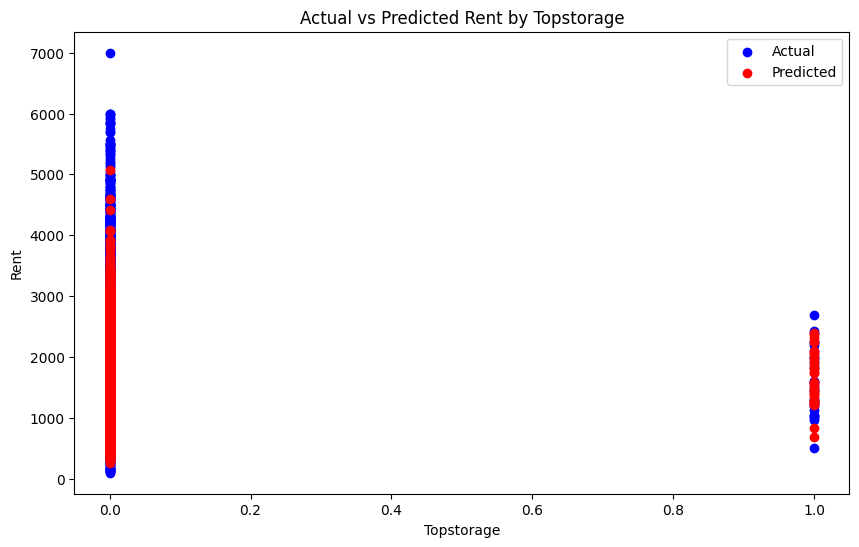

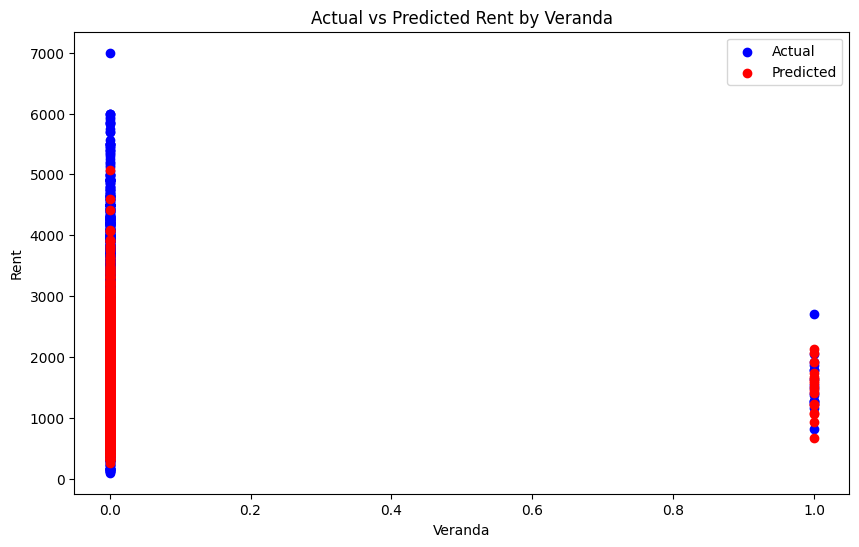

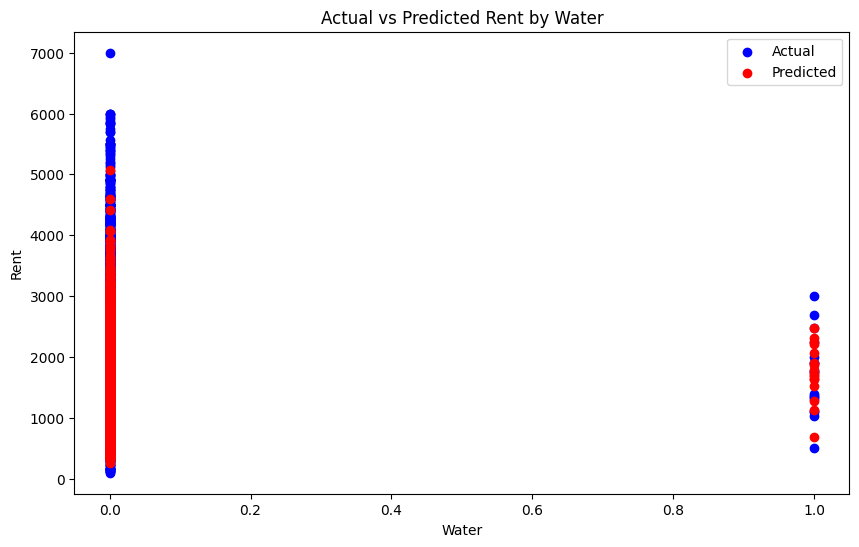

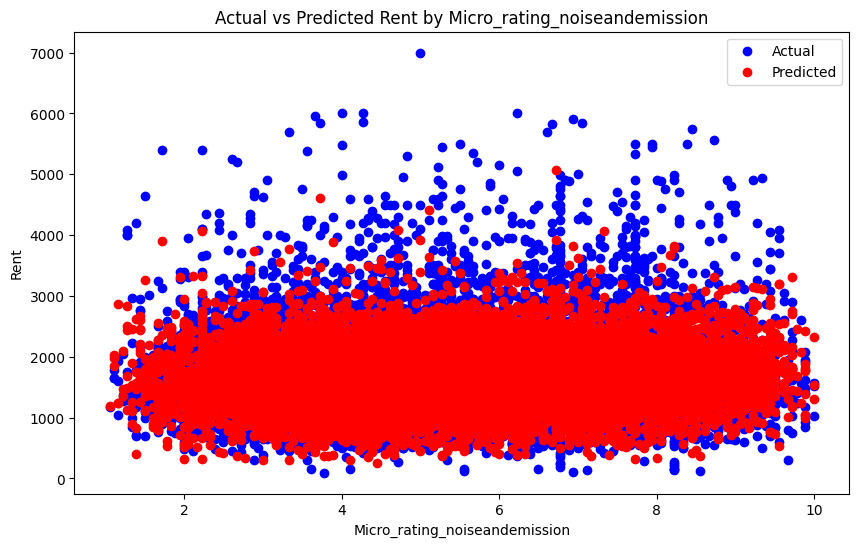

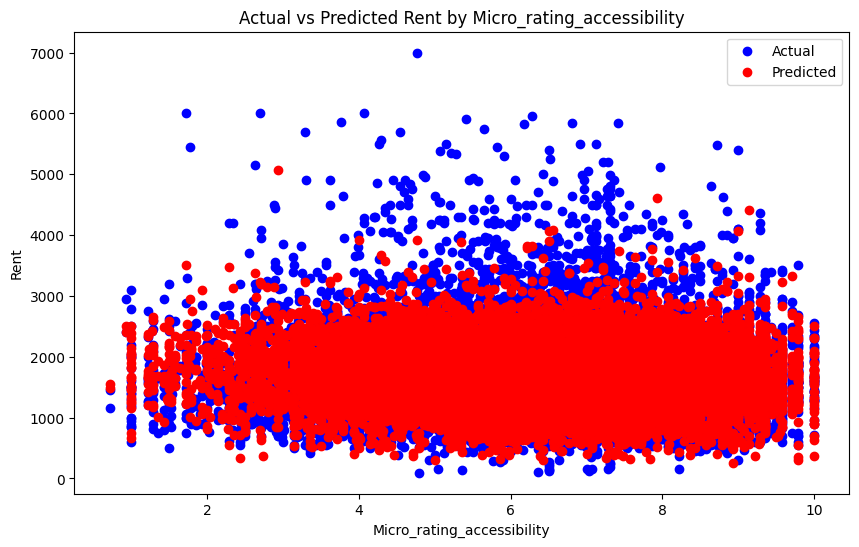

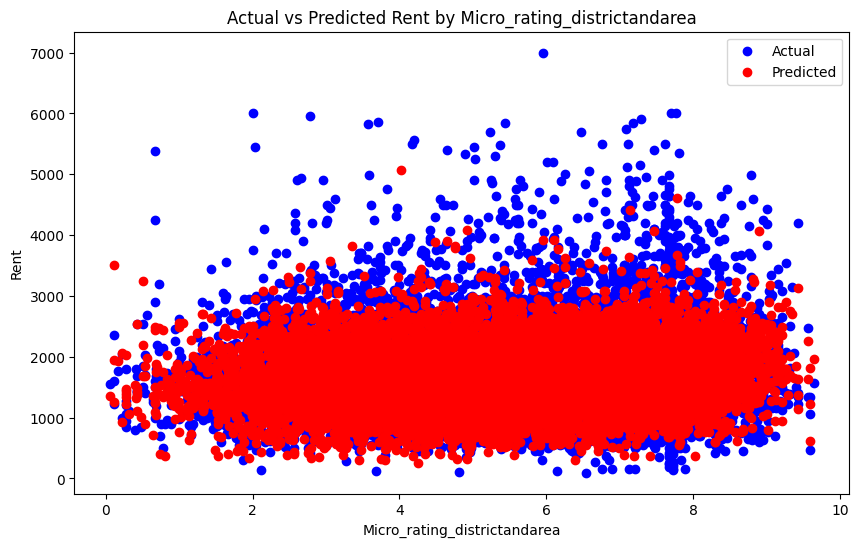

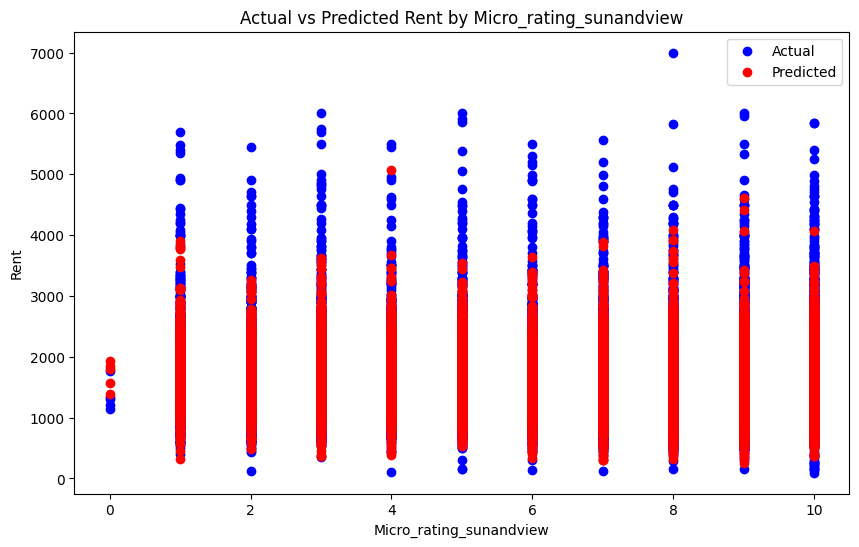

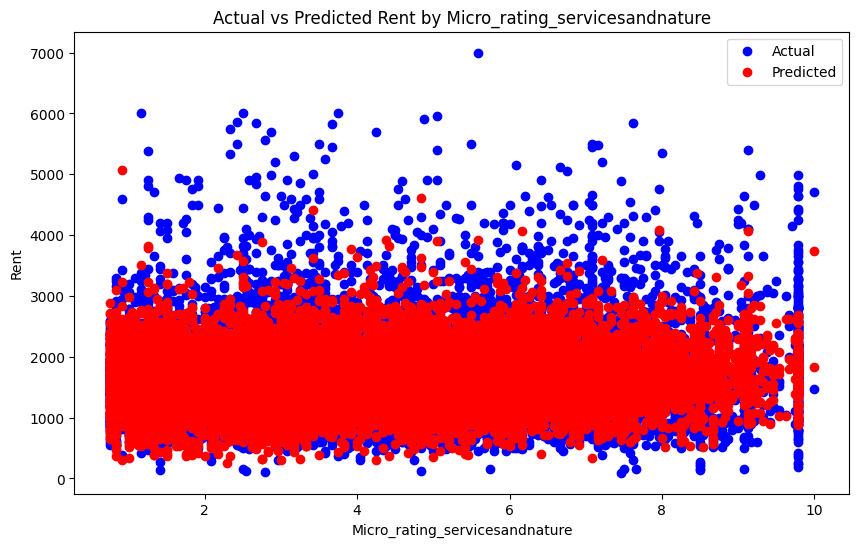

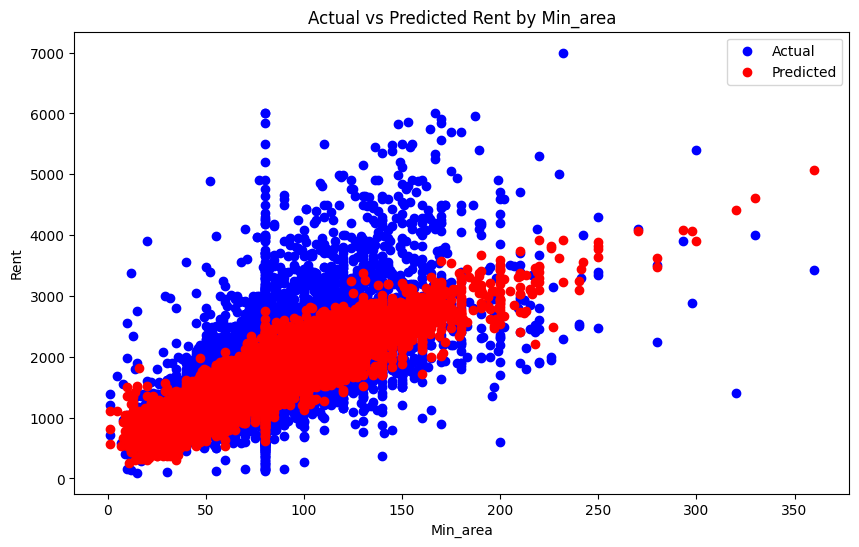

In [113]:
# Here we plot every column against the actual and predicted rent

# Define the parameters list
column_to_exclude = 'rent_full'
params_list = [col for col in data.columns if col != column_to_exclude]


for param in params_list:

    plt.figure(figsize=(10, 6))

    plt.scatter(X_test[param], y_test, color='blue', label='Actual')

    plt.scatter(X_test[param], y_pred, color='red', label='Predicted')

    plt.title(f'Actual vs Predicted Rent by {param.capitalize()}')

    plt.xlabel(param.capitalize())

    plt.ylabel('Rent')

    plt.legend()

    plt.show()
